In [92]:
import pandas as pd

# 데이터 로드
file_path = 'C:\\Users\\Admin\\Documents\\GitHub\\sg_2cha\\jh\\data5\\E-Commerce Churn Data.csv'  # 파일 경로를 지정하세요
data = pd.read_csv(file_path)

# 데이터 구조 확인
print("데이터셋 구조:")
print(data.info())

# 데이터 샘플 확인
print("\n데이터 샘플:")
print(data.head())

# 데이터의 크기 확인
print("\n데이터 크기 (행, 열):", data.shape)


데이터셋 구조:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfA

In [93]:
# 결측치 개수와 비율 확인
missing_values = data.isnull().sum()
missing_percent = (missing_values / len(data)) * 100

print("\n결측치 개수 및 비율:")
print(pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percent}))



결측치 개수 및 비율:
                             Missing Values  Percentage
CustomerID                                0    0.000000
Churn                                     0    0.000000
Tenure                                  264    4.689165
PreferredLoginDevice                      0    0.000000
CityTier                                  0    0.000000
WarehouseToHome                         251    4.458259
PreferredPaymentMode                      0    0.000000
Gender                                    0    0.000000
HourSpendOnApp                          255    4.529307
NumberOfDeviceRegistered                  0    0.000000
PreferedOrderCat                          0    0.000000
SatisfactionScore                         0    0.000000
MaritalStatus                             0    0.000000
NumberOfAddress                           0    0.000000
Complain                                  0    0.000000
OrderAmountHikeFromlastYear             265    4.706927
CouponUsed                        

1. 단계 요약: 데이터 구조와 결측치 확인 결과
2. **데이터 구조**
3. 행(row): 5630개
4. 열(column): 20개
5. 데이터는 범주형 변수(예: PreferredLoginDevice, Gender)와 수치형 변수(예: Tenure, SatisfactionScore)가 혼합되어 있습니다.
6. 일부 열에서 결측치가 발견되었습니다.
7. **결측치 개수 및 비율**
8. Tenure: 4.69%
9. WarehouseToHome: 4.46%
10. HourSpendOnApp: 4.53%
11. OrderAmountHikeFromlastYear: 4.70%
12. CouponUsed: 4.55%
13. OrderCount: 4.58%
14. DaySinceLastOrder: 5.45%

#### **이유**:
- 결측치 비율이 높다면 단순 대체가 데이터의 신뢰성을 크게 저하시킬 수 있습니다.
- 예:
- **5% 미만**: 평균, 중앙값, 최빈값으로 대체 가능.
- **5~30%**: 대체 가능하지만, 대체 방식에 신중해야 함(예: 회귀 기반 대체).
- **30% 이상**: 열 자체를 제거하거나, 분석 목표에 따라 다른 방식을 고려.

---

### **2. 변수의 데이터 분포**
#### **확인 방법**:
- 결측치가 있는 변수의 분포를 시각화합니다.
```python
import seaborn as sns
import matplotlib.pyplot as plt

for var in ['Tenure', 'OrderAmountHikeFromlastYear']:
  sns.histplot(data[var].dropna(), kde=True)
  plt.title(f'Distribution of {var}')
  plt.show()



#### **이유**:
- 변수 간 상관관계가 높다면, 회귀 기반 대체나 다른 변수의 값을 참고하여 결측치를 예측할 수 있습니다.
- 예: `OrderAmountHikeFromlastYear`가 `OrderCount`와 상관관계가 높다면, 회귀 모델을 사용해 결측치를 예측.

---

### **4. 결측치 발생 원인 파악**
#### **확인 방법**:
- 결측치가 의도적(예: 특정 고객 그룹에서만 데이터가 수집되지 않은 경우)인지 확인합니다.
- `Churn`이나 `PreferredLoginDevice` 같은 변수와 결측치의 관계를 확인합니다.
```python
for var in ['Tenure', 'HourSpendOnApp']:
  print(data.groupby('Churn')[var].apply(lambda x: x.isnull().mean()))


In [94]:
# 중복 데이터 확인
duplicate_rows = data.duplicated().sum()
print("\n중복 데이터 개수:", duplicate_rows)



중복 데이터 개수: 0


컬럼이름 변경

In [96]:
# 컬럼 이름 변경 매핑
column_mapping = {
    "CustomerID": "고객 ID",
    "Churn": "이탈 여부",
    "Tenure": "가입 기간",
    "PreferredLoginDevice": "접속 기기",
    "CityTier": "도시 등급",
    "WarehouseToHome": "배송거리",
    "PreferredPaymentMode": "결제 방식",
    "Gender": "성별",
    "HourSpendOnApp": "앱 사용 시간",
    "NumberOfDeviceRegistered": "기기 수",
    "PreferedOrderCat": "주문 카테고리",
    "SatisfactionScore": "만족도",
    "MaritalStatus": "결혼 여부",
    "NumberOfAddress": "주소 수",
    "Complain": "불만족 여부",
    "OrderAmountHikeFromlastYear": "주문 증가율",
    "CouponUsed": "쿠폰 수",
    "OrderCount": "주문 횟수",
    "DaySinceLastOrder": "경과일",
    "CashbackAmount": "캐시백 금액"
}

# 데이터프레임 컬럼 이름 변경
data.rename(columns=column_mapping, inplace=True)

# 변경된 컬럼 이름 확인
print("변경된 컬럼 이름:")
print(data.columns)


변경된 컬럼 이름:
Index(['고객 ID', '이탈 여부', '가입 기간', '접속 기기', '도시 등급', '배송거리', '결제 방식', '성별',
       '앱 사용 시간', '기기 수', '주문 카테고리', '만족도', '결혼 여부', '주소 수', '불만족 여부',
       '주문 증가율', '쿠폰 수', '주문 횟수', '경과일', '캐시백 금액'],
      dtype='object')


In [97]:
data.describe()

,고객 ID,이탈 여부,가입 기간,도시 등급,배송거리,앱 사용 시간,기기 수,만족도,주소 수,불만족 여부,주문 증가율,쿠폰 수,주문 횟수,경과일,캐시백 금액
count,5630.000000,5630.000000,5366.000000,5630.000000,5379.000000,5375.000000,5630.000000,5630.000000,5630.000000,5630.000000,5365.000000,5374.000000,5372.000000,5323.000000,5630.000000
mean,52815.500000,0.168384,10.189899,1.654707,15.639896,2.931535,3.688988,3.066785,4.214032,0.284902,15.707922,1.751023,3.008004,4.543491,177.221492
std,1625.385339,0.374240,8.557241,0.915389,8.531475,0.721926,1.023999,1.380194,2.583586,0.451408,3.675485,1.894621,2.939680,3.654433,49.193869
min,50001.000000,0.000000,0.000000,1.000000,5.000000,0.000000,1.000000,1.000000,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,0.000000
25%,51408.250000,0.000000,2.000000,1.000000,9.000000,2.000000,3.000000,2.000000,2.000000,0.000000,13.000000,1.000000,1.000000,2.000000,146.000000
50%,52815.500000,0.000000,9.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,15.000000,1.000000,2.000000,3.000000,163.000000
75%,54222.750000,0.000000,16.000000,3.000000,20.000000,3.000000,4.000000,4.000000,6.000000,1.000000,18.000000,2.000000,3.000000,7.000000,196.000000
max,55630.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,26.000000,16.000000,16.000000,46.000000,325.000000


- 데이터 분포 및 특성
1. 이탈 고객 비율:
    - 전체 고객 중 약 16.8%가 이탈. 클래스 불균형 가능성 존재.
2. 가입 기간(Tenure): 
    - 가입 기간이 짧은 고객이 많음(25%가 1개월 이하).
    - 초기 고객 유지가 중요한 문제로 보임.
3. 도시 등급 및 거리:
    - 평균적으로 1등급 도시(대도시)에 거주하는 고객이 많으며, 물류센터에서 집까지(배송거리) 거리는 평균 15km.
4. 만족도 및 주문 관련 데이터:
    - 만족도가 중간 수준이며, 대부분의 고객이 적은 주문 수와 쿠폰 사용을 보임.
    - 전년도 대비 주문 금액 증가율이 높은 고객이 일부 존재.

In [98]:
data


,고객 ID,이탈 여부,가입 기간,접속 기기,도시 등급,배송거리,결제 방식,성별,앱 사용 시간,기기 수,주문 카테고리,만족도,결혼 여부,주소 수,불만족 여부,주문 증가율,쿠폰 수,주문 횟수,경과일,캐시백 금액
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,160
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,121
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,55626,0,10.0,Computer,1,30.0,Credit Card,Male,3.0,2,Laptop & Accessory,1,Married,6,0,18.0,1.0,2.0,4.0,151
5626,55627,0,13.0,Mobile Phone,1,13.0,Credit Card,Male,3.0,5,Fashion,5,Married,6,0,16.0,1.0,2.0,NaN,225
5627,55628,0,1.0,Mobile Phone,1,11.0,Debit Card,Male,3.0,2,Laptop & Accessory,4,Married,3,1,21.0,1.0,2.0,4.0,186
5628,55629,0,23.0,Computer,3,9.0,Credit Card,Male,4.0,5,Laptop & Accessory,4,Married,4,0,15.0,2.0,2.0,9.0,179


이탈 여부 분포 (%):
0    83.161634
1    16.838366
Name: 이탈 여부, dtype: float64


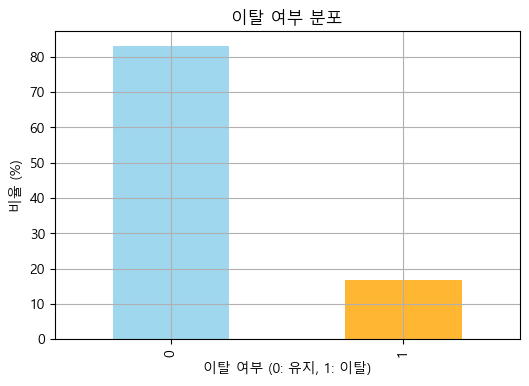

In [24]:
# 맑은고딕 폰트 설정
plt.rc('font', family='Malgun Gothic')

# Churn 변수 분포 확인
churn_counts = data['이탈 여부'].value_counts(normalize=True) * 100
print("이탈 여부 분포 (%):")
print(churn_counts)

# 시각화
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 4))
churn_counts.plot(kind='bar', color=['skyblue', 'orange'], alpha=0.8)
plt.title("이탈 여부 분포")
plt.xlabel("이탈 여부 (0: 유지, 1: 이탈)")
plt.ylabel("비율 (%)")
plt.grid(True)



plt.show()


고객 이탈 (`Churn`) 변수의 불균형 상태를 보여줍니다. **약 16.8%의 고객이 이탈**하고, **83.1%의 고객이 유지**되었습니다.

---

### **분석 및 전처리 필요 사항**

1. **데이터 불균형 문제**
   - 이탈 고객과 유지 고객 간 비율 차이가 큽니다.
   - 학습 데이터가 불균형할 경우, 모델이 다수 클래스(유지 고객)에 편향될 가능성이 있습니다.

   **해결 방법**:
   - **샘플링**:
     - 소수 클래스(이탈 고객)를 증강하는 **Oversampling (예: SMOTE)**.
     - 다수 클래스(유지 고객)를 감소시키는 **Undersampling**.
   - **클래스 가중치 조정**:
     - 모델 학습 시 소수 클래스에 높은 가중치를 부여하여 균형을 맞춤.


In [8]:
# 범주형 변수의 고유값 확인
# 범주형 변수들이 예상한 값 범위 내에 있는지 확인합니다. 예를 들어, Gender, PreferredPaymentMode 등에서 이상한 값이나 입력 오류가 있는지 점검
categorical_columns = ['접속 기기', '결제 방식', '성별', '주문 카테고리', '결혼 여부']
for col in categorical_columns:
    print(f"{col}의 고유값:", data[col].unique())

접속 기기의 고유값: ['Mobile Phone' 'Phone' 'Computer']
결제 방식의 고유값: ['Debit Card' 'UPI' 'CC' 'Cash on Delivery' 'E wallet' 'COD' 'Credit Card']
성별의 고유값: ['Female' 'Male']
주문 카테고리의 고유값: ['Laptop & Accessory' 'Mobile' 'Mobile Phone' 'Others' 'Fashion' 'Grocery']
결혼 여부의 고유값: ['Single' 'Divorced' 'Married']


현재 데이터프레임의 열 이름:
Index(['고객 ID', '이탈 여부', '가입 기간', '접속 기기', '도시 등급', '배송거리', '결제 방식', '성별',
       '앱 사용 시간', '기기 수', '주문 카테고리', '만족도', '결혼 여부', '주소 수', '불만 여부', '주문 증가율',
       '쿠폰 수', '주문 횟수', '경과일', '캐시백 금액', '배송거리_구간'],
      dtype='object')


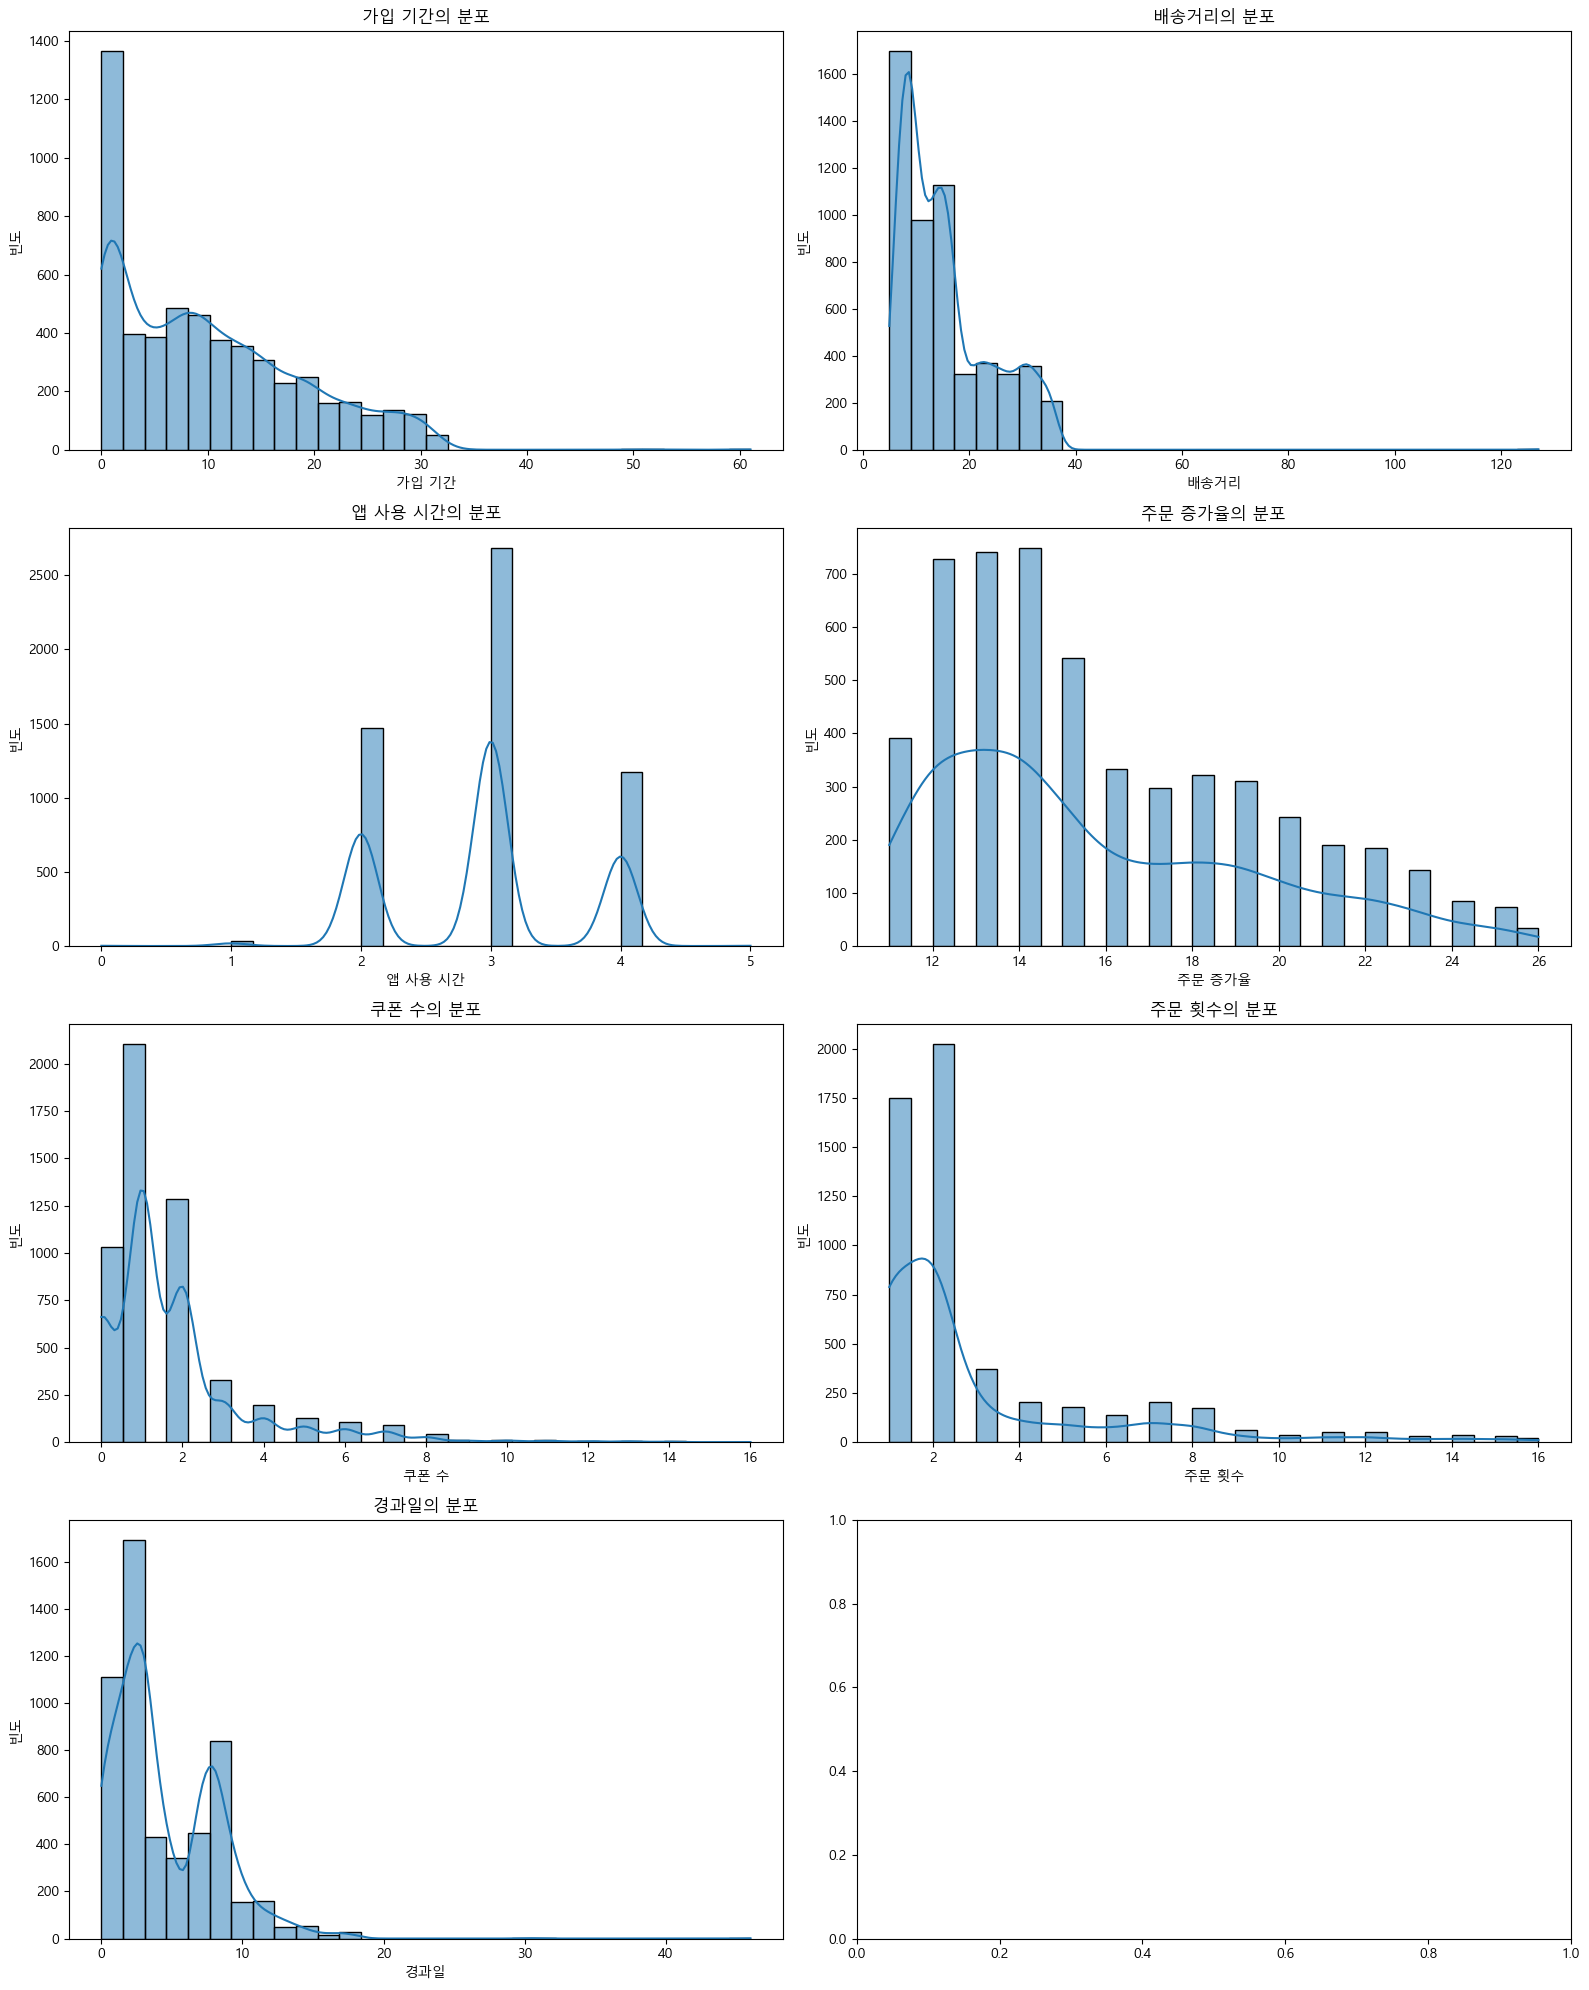

가입 기간의 분포: 
- 대부분의 고객은 **가입 기간이 짧음**(0~10개월).
- 가입 기간이 길어질수록 고객 수는 점진적으로 감소.
- 일부 고객은 장기적으로 유지(40개월 이상)..

배송거리: 
- **0~10km 거리**에 가장 많은 고객이 분포.
- 꼬리가 긴 분포를 보여 일부 고객은 100km 이상의 먼 거리에 위치.

앱 사용 시간의 분포: 
- **3시간대에 피크**를 보이는 다중봉형 분포.
-   일부 고객은 앱 사용 시간이 1시간 미만으로 매우 적음.

주문 증가율의 분포: 
- **15%~20% 증가율**을 보이는 고객이 가장 많음.
- 꼬리가 긴 분포로, 일부 고객은 25% 이상의 높은 증가율을 기록.

쿠폰 수의 분포: 
- 대부분의 고객은 **0~2개**의 쿠폰을 사용.
- 일부 고객은 **10개 이상**의 쿠폰을 사용하여 높은 활용도를 보임.

주문 횟수의 분포: 
- 대다수 고객의 주문 횟수는 **1~5회**에 집중.
- 꼬리가 긴 분포로, 일부 고객은 **10회 이상** 주문.

경과일의 분포: 
- 최근 주문 후 **0~10일**이 지난 고객이 대부분.
- 일부 고객은 **20일 이상** 경과.

요약: 
- 대부분의 변수는 **비대칭 분포**를 보이며, 꼬리가 긴 형태가 특징적.
- 고객 특성은 **짧은 활동 주기**(가입 기간, 앱 사용 시간, 경과일)에 집중.
- 극단값이 존재하므로 **중앙값 기반 결측치 처리**나 **로그 변환** 등 적절한 처리가 필요.


In [15]:
# 데이터프레임의 열 이름 확인
print("현재 데이터프레임의 열 이름:")
print(data.columns)

# 시각화 코드 수정
numerical_vars = ['가입 기간', '배송거리', '앱 사용 시간', 
                  '주문 증가율', '쿠폰 수', 
                  '주문 횟수', '경과일']  # '배송 거리'를 '창고→집 거리'로 수정

# 윈도우 기본폰트로 설정하여 폰트오류 해결
plt.rc('font', family='Malgun Gothic')

# 2열로 시각화
fig, axs = plt.subplots(len(numerical_vars) // 2 + (1 if len(numerical_vars) % 2 != 0 else 0), 2, figsize=(16, 20))

for i, var in enumerate(numerical_vars):
    row = i // 2
    col = i % 2
    sns.histplot(data[var].dropna(), kde=True, bins=30, ax=axs[row, col])
    axs[row, col].set_title(f'{var}의 분포')
    axs[row, col].set_xlabel(var)
    axs[row, col].set_ylabel('빈도')

plt.tight_layout()
# 그래프 표시
plt.tight_layout()
plt.show()

# 분석 결과 요약
analysis_summary = {
    "가입 기간의 분포": '\n'"- 대부분의 고객은 **가입 기간이 짧음**(0~10개월).\n- 가입 기간이 길어질수록 고객 수는 점진적으로 감소.\n- 일부 고객은 장기적으로 유지(40개월 이상)..",
    '\n'"배송거리": '\n'"- **0~10km 거리**에 가장 많은 고객이 분포.\n- 꼬리가 긴 분포를 보여 일부 고객은 100km 이상의 먼 거리에 위치.",
    '\n'"앱 사용 시간의 분포":'\n'"- **3시간대에 피크**를 보이는 다중봉형 분포.\n-   일부 고객은 앱 사용 시간이 1시간 미만으로 매우 적음.",
    '\n'"주문 증가율의 분포": '\n'"- **15%~20% 증가율**을 보이는 고객이 가장 많음.\n- 꼬리가 긴 분포로, 일부 고객은 25% 이상의 높은 증가율을 기록.",
    '\n'"쿠폰 수의 분포": '\n'"- 대부분의 고객은 **0~2개**의 쿠폰을 사용.\n- 일부 고객은 **10개 이상**의 쿠폰을 사용하여 높은 활용도를 보임.",
    '\n'"주문 횟수의 분포": '\n'"- 대다수 고객의 주문 횟수는 **1~5회**에 집중.\n- 꼬리가 긴 분포로, 일부 고객은 **10회 이상** 주문.",
    '\n'"경과일의 분포": '\n'"- 최근 주문 후 **0~10일**이 지난 고객이 대부분.\n- 일부 고객은 **20일 이상** 경과.",
    '\n'"요약":'\n' "- 대부분의 변수는 **비대칭 분포**를 보이며, 꼬리가 긴 형태가 특징적.\n- 고객 특성은 **짧은 활동 주기**(가입 기간, 앱 사용 시간, 경과일)에 집중.\n- 극단값이 존재하므로 **중앙값 기반 결측치 처리**나 **로그 변환** 등 적절한 처리가 필요."
}

# 분석 결과 출력
for key, value in analysis_summary.items():
    print(f"{key}: {value}")




1단계: 변수별 분포 분석

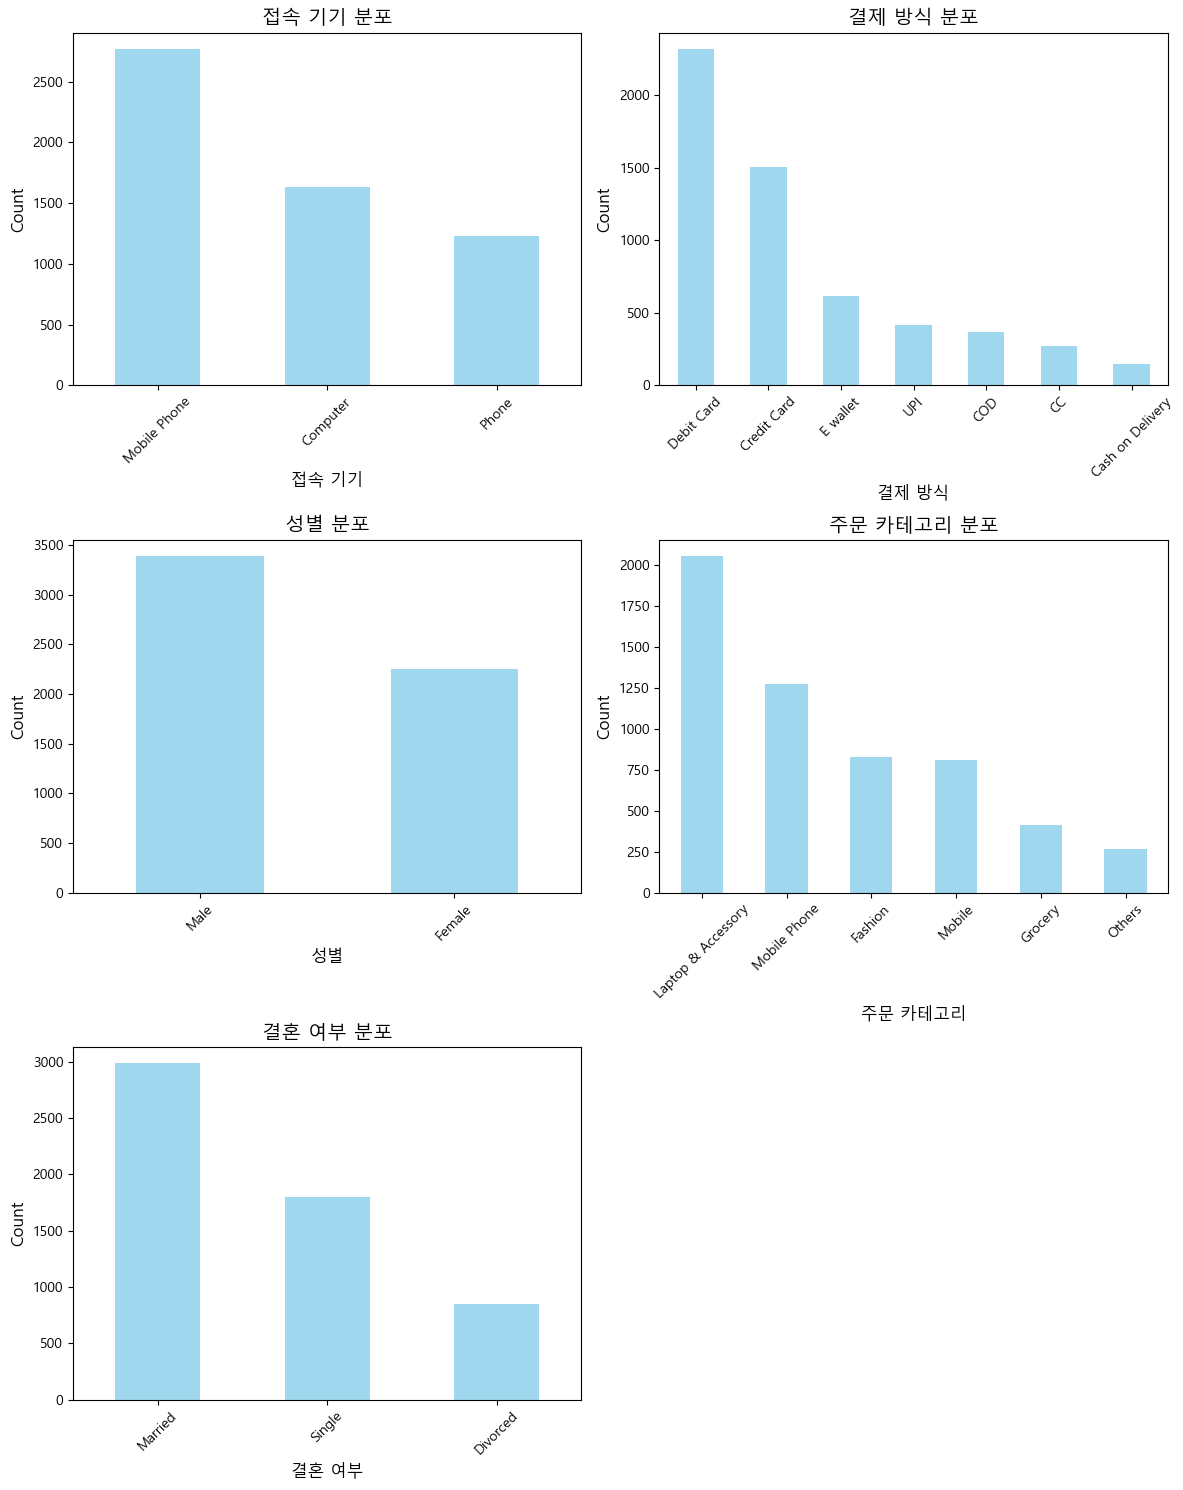

접속 기기: 모바일 장치가 주요 로그인 방법일 가능성이 높습니다.
결제 방식: 가장 많이 사용되는 결제 방법은 특정 방식(예: 카드, UPI 등)이 우세할 것으로 예상됩니다.
성별: 성별 분포가 균등하지 않을 수 있으며, 특정 성별이 더 높은 비율을 차지할 가능성이 있습니다.
주문 카테고리: 주문 카테고리 분포를 통해 특정 제품군(예: 전자 제품, 모바일 액세서리 등)의 선호도가 높음을 확인할 수 있습니다.
결혼 여부: 기혼 여부에 따라 고객의 쇼핑 행동 차이가 나타날 가능성이 있습니다.


In [10]:
import matplotlib.pyplot as plt

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'

# 3행 2열로 차트 구성
fig, axes = plt.subplots(3, 2, figsize=(12, 15))
axes = axes.flatten()

# Categorical columns identified earlier
categorical_columns = ['접속 기기', '결제 방식', '성별', '주문 카테고리', '결혼 여부']

# 범주형 변수 분포 시각화 및 분석
for i, col in enumerate(categorical_columns):
    value_counts = data[col].value_counts()
    value_counts.plot(kind='bar', ax=axes[i], color='skyblue', alpha=0.8)
    axes[i].set_title(f"{col} 분포", fontsize=14)
    axes[i].set_xlabel(col, fontsize=12)
    axes[i].set_ylabel("Count", fontsize=12)
    axes[i].tick_params(axis='x', rotation=45)

# 마지막 빈 서브플롯 제거
fig.delaxes(axes[-1])

# 그래프 표시
plt.tight_layout()
plt.show()

# 분석 결과 요약
categorical_analysis = {
    "접속 기기": "모바일 장치가 주요 로그인 방법일 가능성이 높습니다.",
    "결제 방식": "가장 많이 사용되는 결제 방법은 특정 방식(예: 카드, UPI 등)이 우세할 것으로 예상됩니다.",
    "성별": "성별 분포가 균등하지 않을 수 있으며, 특정 성별이 더 높은 비율을 차지할 가능성이 있습니다.",
    "주문 카테고리": "주문 카테고리 분포를 통해 특정 제품군(예: 전자 제품, 모바일 액세서리 등)의 선호도가 높음을 확인할 수 있습니다.",
    "결혼 여부": "기혼 여부에 따라 고객의 쇼핑 행동 차이가 나타날 가능성이 있습니다."
}

# 분석 결과 출력
for key, value in categorical_analysis.items():
    print(f"{key}: {value}")


In [25]:
data

,고객 ID,이탈 여부,가입 기간,접속 기기,도시 등급,배송거리,결제 방식,성별,앱 사용 시간,기기 수,...,만족도,결혼 여부,주소 수,만족도,주문 증가율,쿠폰 수,주문 횟수,경과일,캐시백 금액,배송거리_구간
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,...,2,Single,9,1,11.0,1.0,1.0,5.0,160,0-10km
1,50002,1,0.0,Phone,1,8.0,UPI,Male,3.0,4,...,3,Single,7,1,15.0,0.0,1.0,0.0,121,0-10km
2,50003,1,0.0,Phone,1,30.0,Debit Card,Male,2.0,4,...,3,Single,6,1,14.0,0.0,1.0,3.0,120,20-30km
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,...,5,Single,8,0,23.0,0.0,1.0,3.0,134,10-20km
4,50005,1,0.0,Phone,1,12.0,CC,Male,0.0,3,...,5,Single,3,0,11.0,1.0,1.0,3.0,130,10-20km
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,55626,0,10.0,Computer,1,30.0,Credit Card,Male,3.0,2,...,1,Married,6,0,18.0,1.0,2.0,4.0,151,20-30km
5626,55627,0,13.0,Mobile Phone,1,13.0,Credit Card,Male,3.0,5,...,5,Married,6,0,16.0,1.0,2.0,0.0,225,10-20km
5627,55628,0,1.0,Mobile Phone,1,11.0,Debit Card,Male,3.0,2,...,4,Married,3,1,21.0,1.0,2.0,4.0,186,10-20km
5628,55629,0,23.0,Computer,3,9.0,Credit Card,Male,4.0,5,...,4,Married,4,0,15.0,2.0,2.0,9.0,179,0-10km


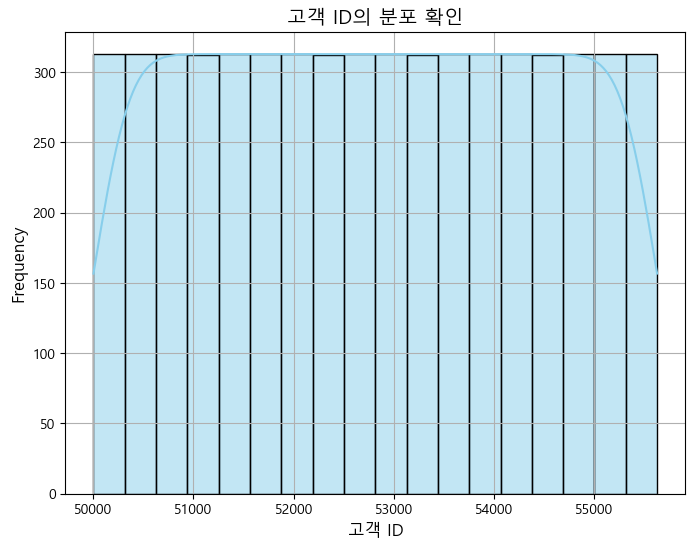

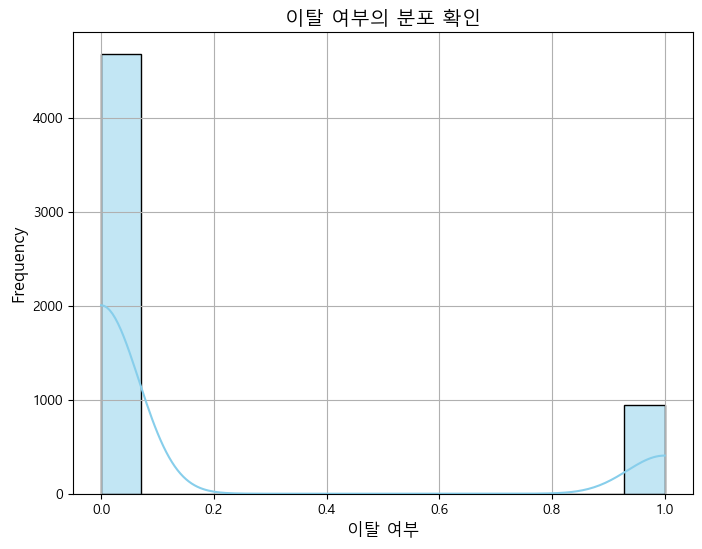

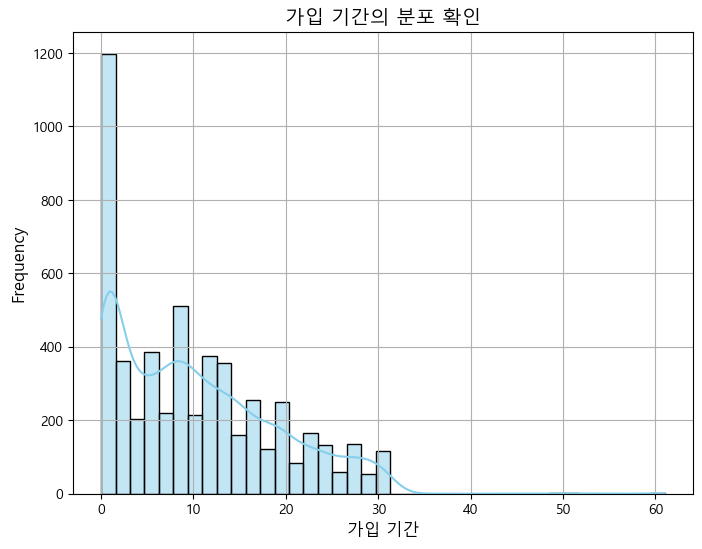

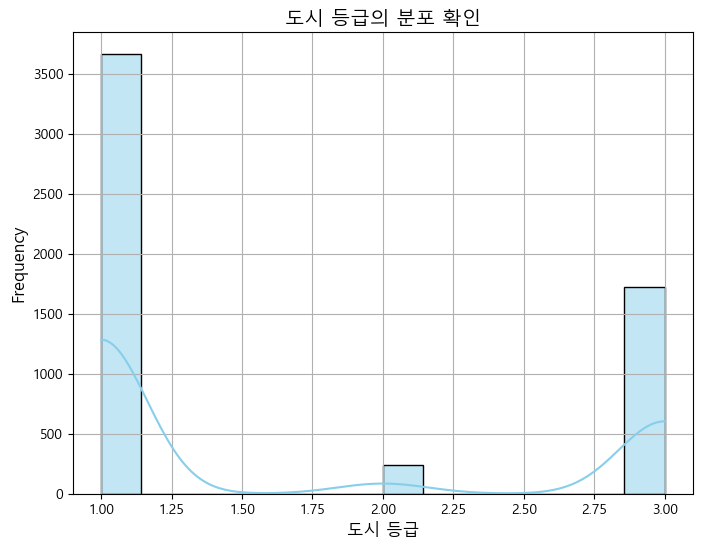

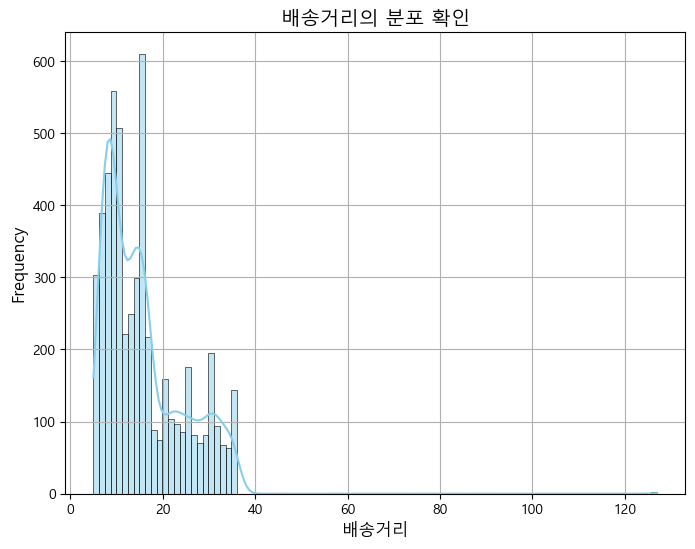

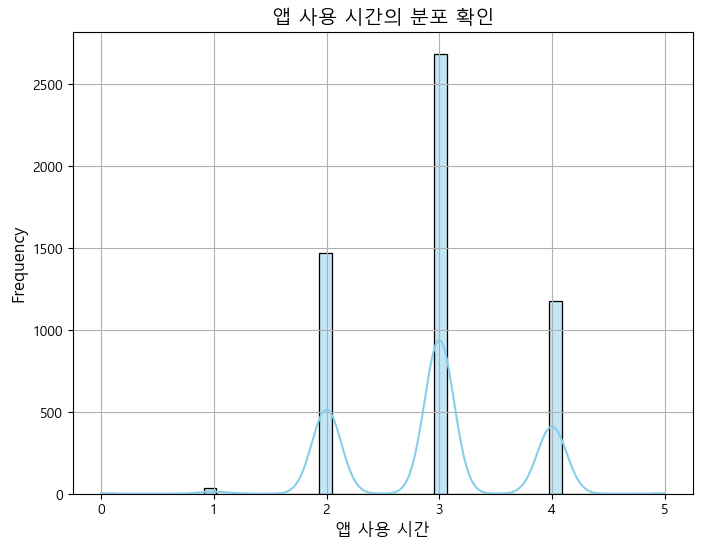

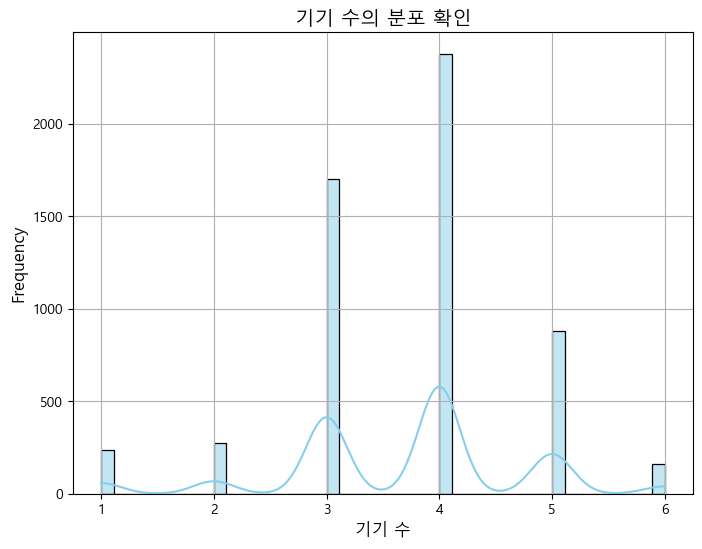

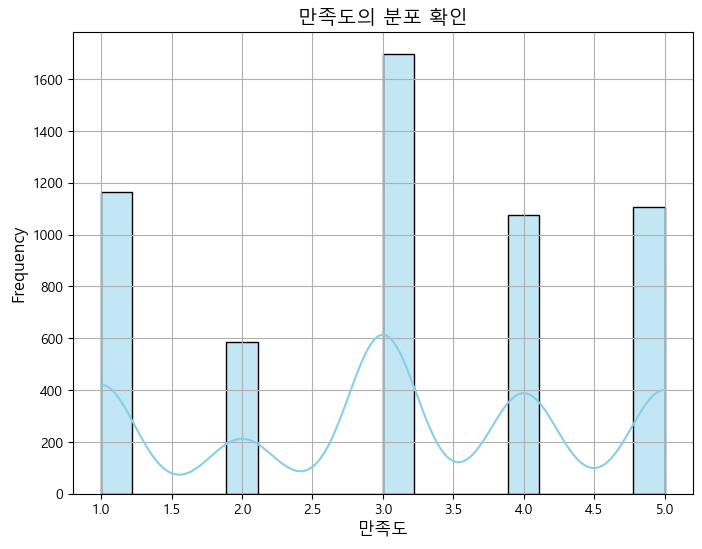

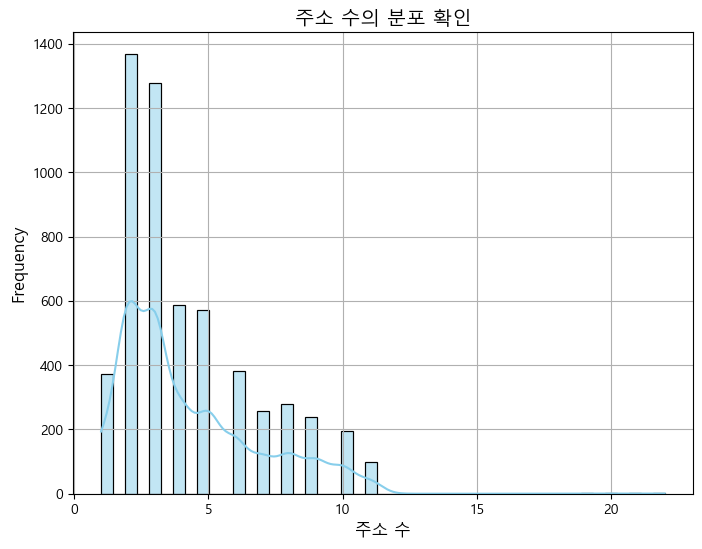

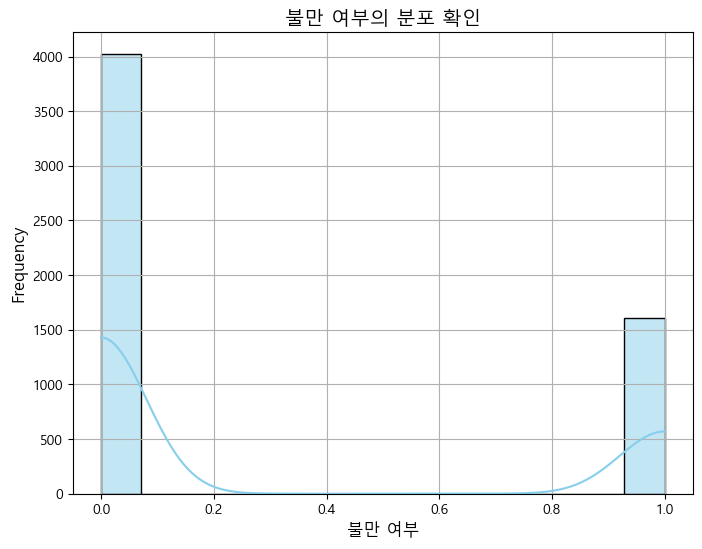

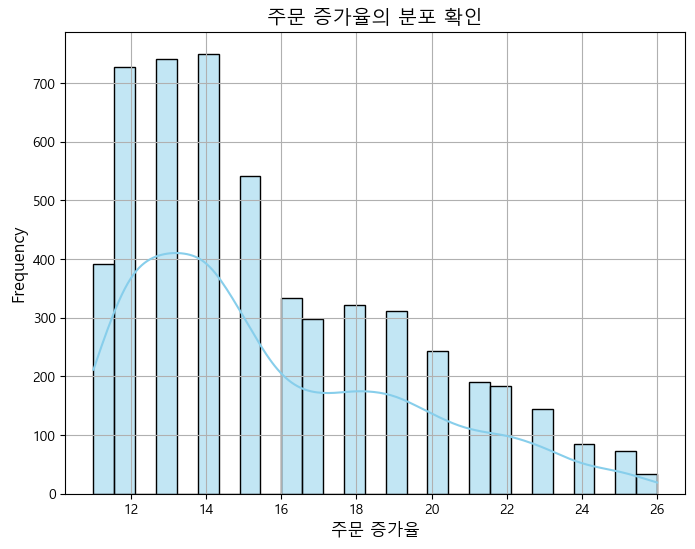

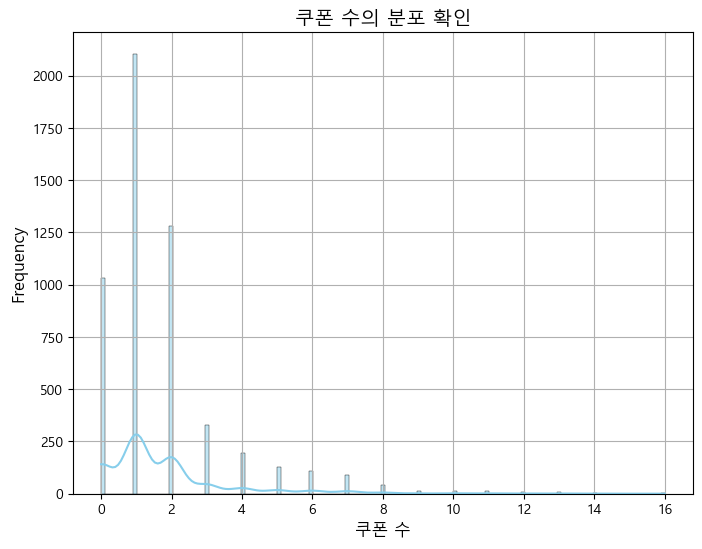

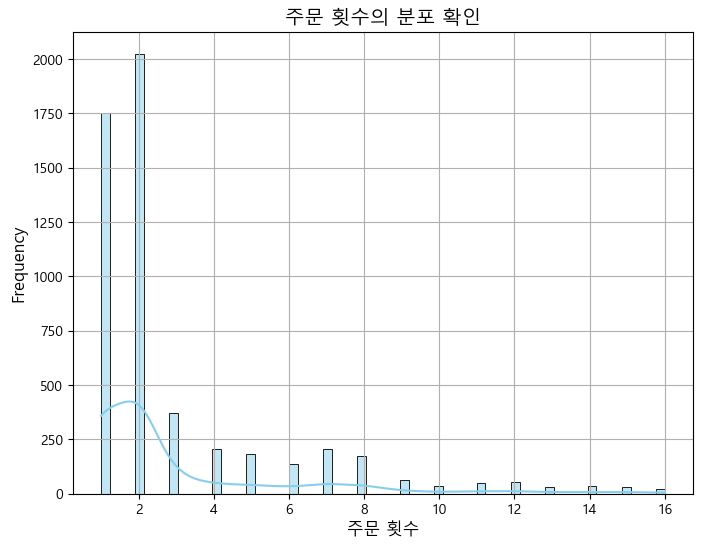

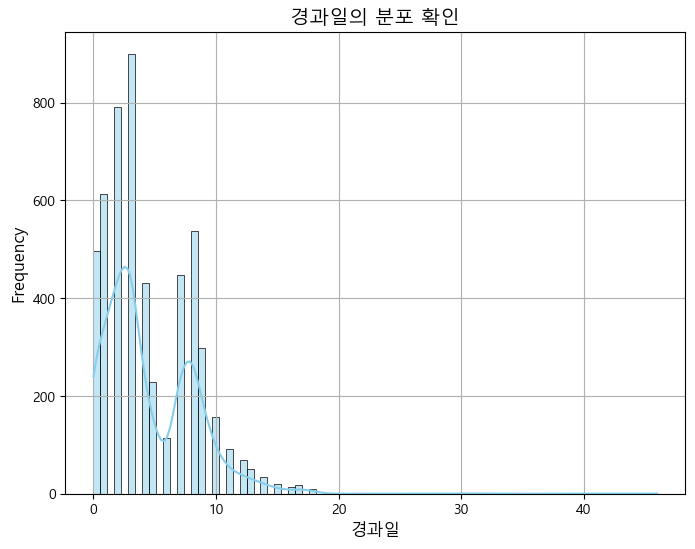

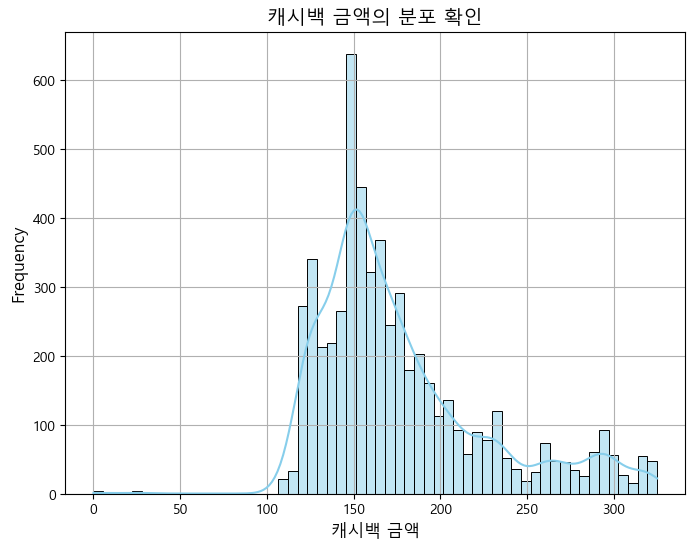

In [13]:
# 수치형 변수의 분포 확인
# 수치형 변수들이 실제로 적절한 범위 내에 있는지 확인하고, 이상치가 존재하는지 시각적으로 확인합니다. 예를 들어, OrderAmountHikeFromlastYear, DaySinceLastOrder 등에서 비현실적인 값이 있는지 체크
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns
for col in numerical_columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(data[col], kde=True, color='skyblue')
    plt.title(f"{col}의 분포 확인", fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel("Frequency", fontsize=12)
    plt.grid(True)
    plt.show()

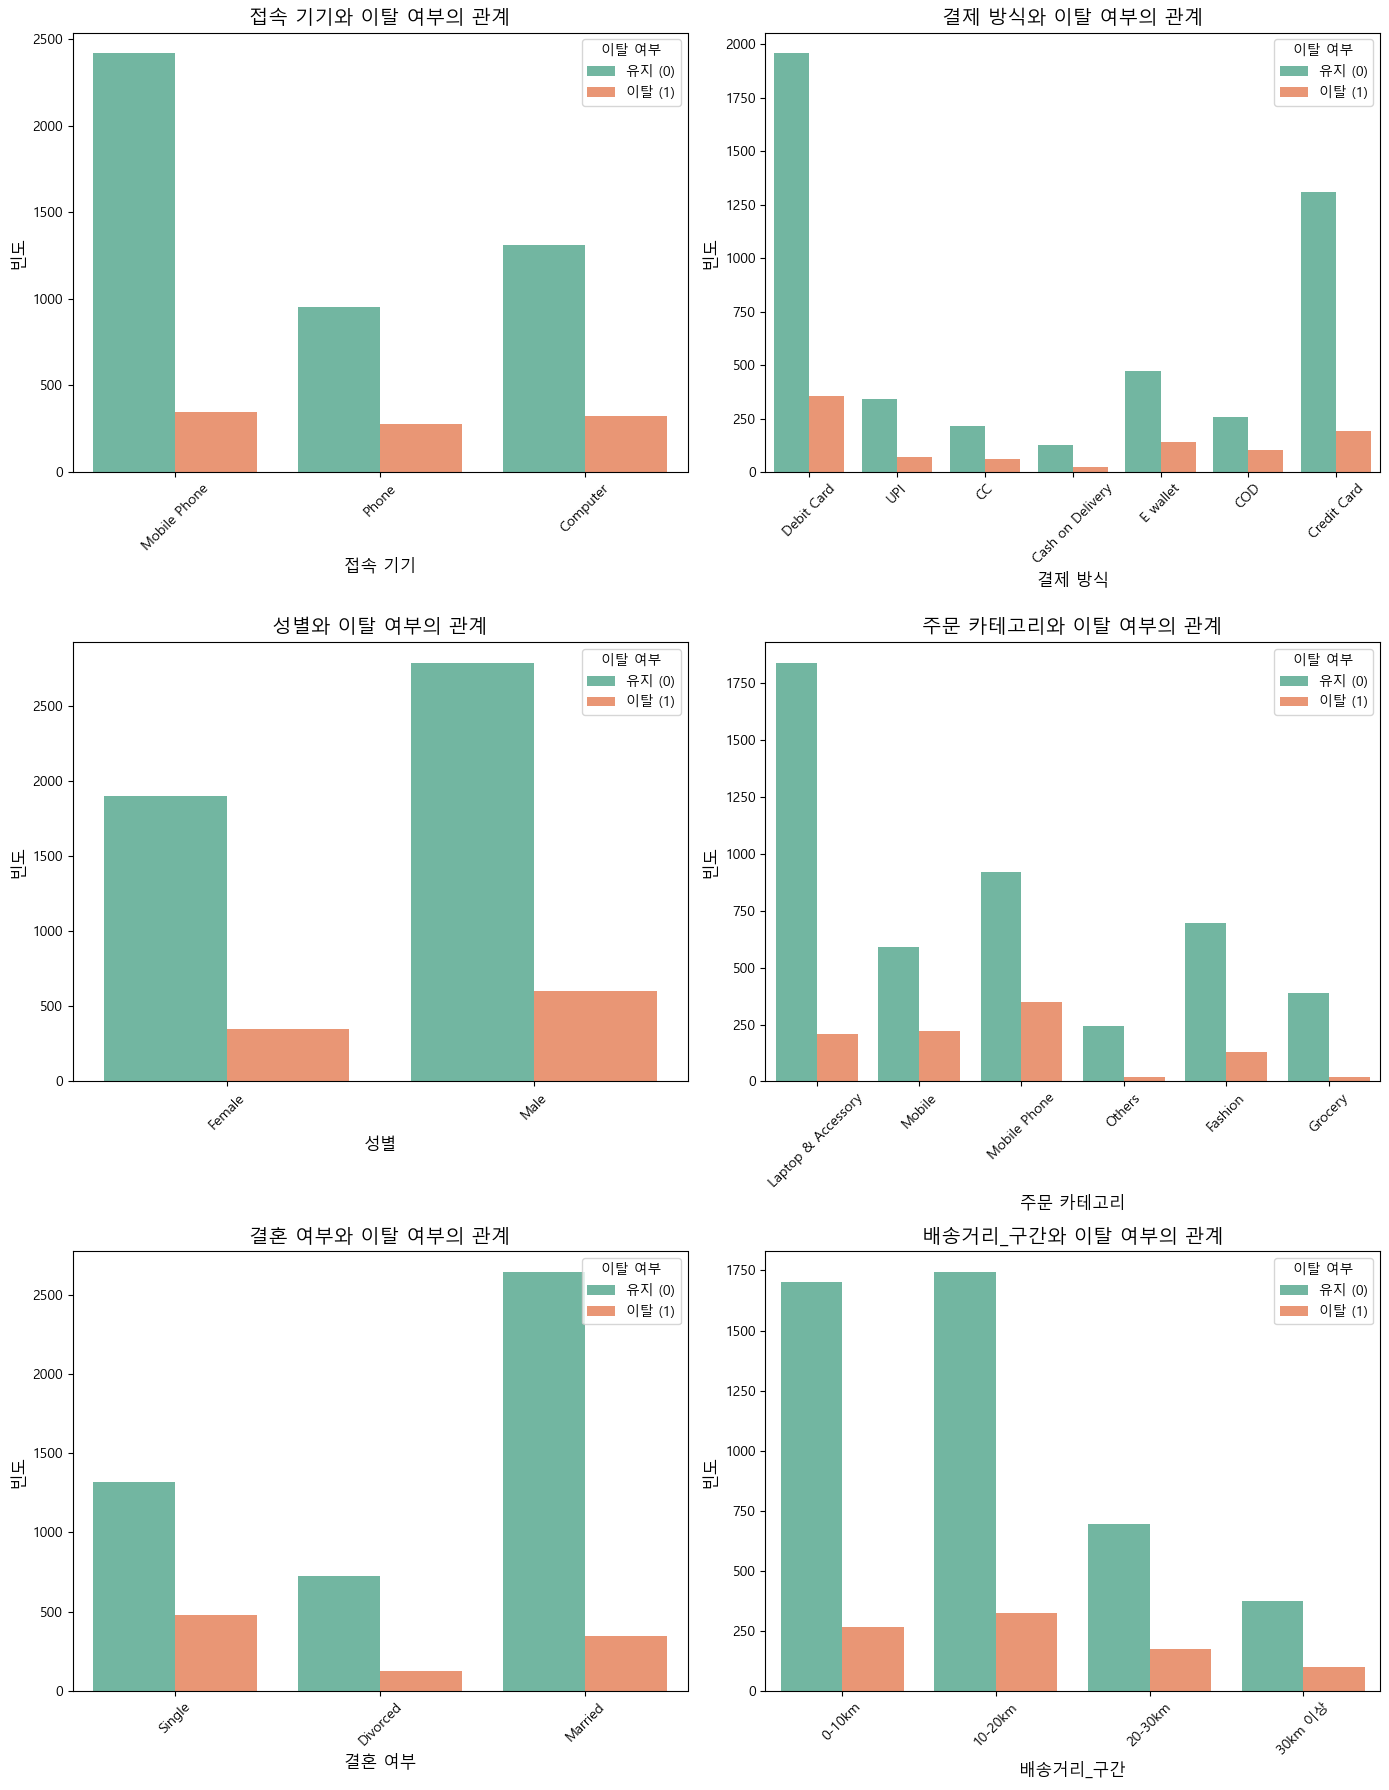

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 배송거리를 구간으로 나누어 새로운 범주형 변수 생성
data['배송거리_구간'] = pd.cut(data['배송거리'], 
                          bins=[0, 10, 20, 30, float('inf')],
                          labels=['0-10km', '10-20km', '20-30km', '30km 이상'])

# 3행 2열로 차트 수정
fig, axes = plt.subplots(3, 2, figsize=(14, 18))
axes = axes.flatten()

# 범주형 변수와 Churn 간 관계 시각화
categorical_columns_with_distance = categorical_columns + ['배송거리_구간']

for i, col in enumerate(categorical_columns_with_distance):
    sns.countplot(x=col, hue='이탈 여부', data=data, palette='Set2', ax=axes[i])
    axes[i].set_title(f"{col}와 이탈 여부의 관계", fontsize=14)
    axes[i].set_xlabel(col, fontsize=12)
    axes[i].set_ylabel("빈도", fontsize=12)
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].legend(title="이탈 여부", loc='upper right', labels=['유지 (0)', '이탈 (1)'])

# 마지막 빈 서브플롯 제거
if len(categorical_columns_with_distance) < len(axes):
    for j in range(len(categorical_columns_with_distance), len(axes)):
        fig.delaxes(axes[j])

# 레이아웃 조정
plt.tight_layout()
plt.show()

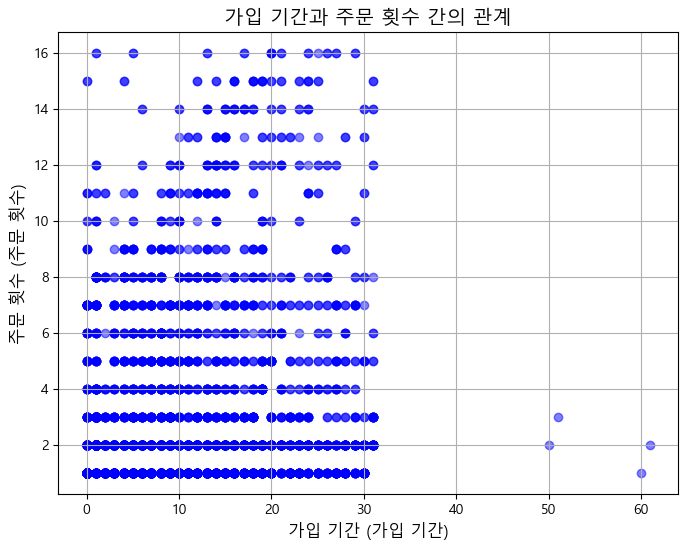

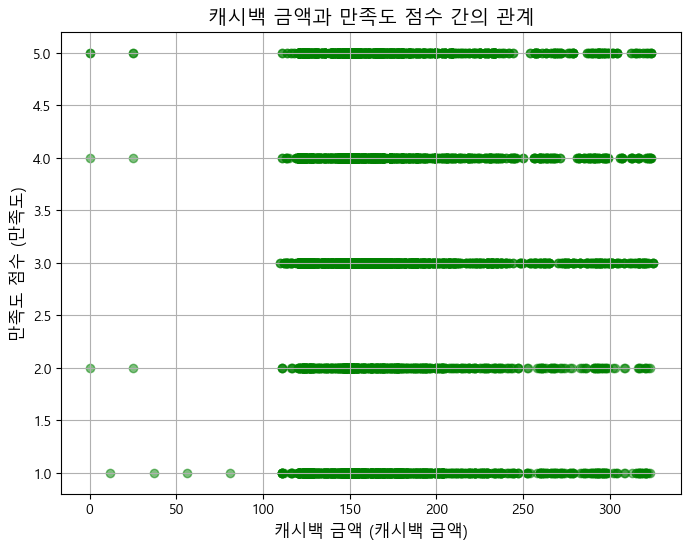

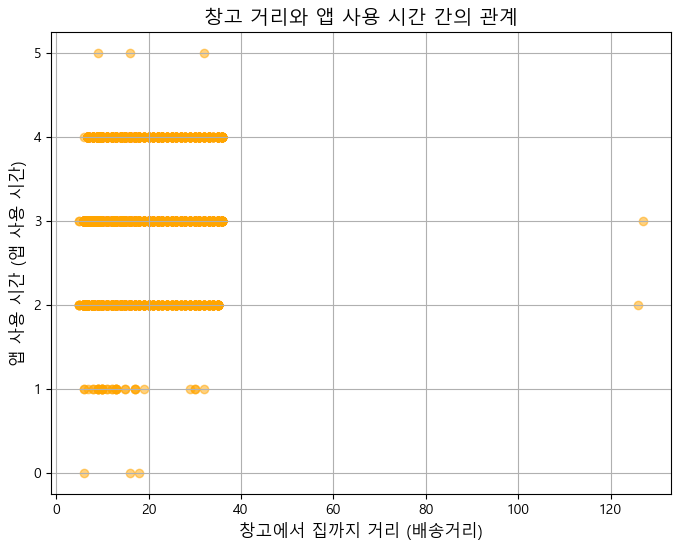

In [17]:
# 한글 폰트 설정 (자동 검색)
plt.rcParams['font.family'] = 'Malgun Gothic'

# 산점도: 가입 기간 주문 횟수 간의 관계
plt.figure(figsize=(8, 6))
plt.scatter(data['가입 기간'], data['주문 횟수'], alpha=0.5, c='blue')
plt.title("가입 기간과 주문 횟수 간의 관계", fontsize=14)
plt.xlabel("가입 기간 (가입 기간)", fontsize=12)
plt.ylabel("주문 횟수 (주문 횟수)", fontsize=12)
plt.grid(True)
plt.show()

# 산점도: "캐시백 금액와 만족도 간의 관계
plt.figure(figsize=(8, 6))
plt.scatter(data['캐시백 금액'], data['만족도'], alpha=0.5, c='green')
plt.title("캐시백 금액과 만족도 점수 간의 관계", fontsize=14)
plt.xlabel("캐시백 금액 (캐시백 금액)", fontsize=12)
plt.ylabel("만족도 점수 (만족도)", fontsize=12)
plt.grid(True)
plt.show()

# 산점도: 배송거리와 앱 사용 시간 간의 관계
plt.figure(figsize=(8, 6))
plt.scatter(data['배송거리'], data['앱 사용 시간'], alpha=0.5, c='orange')
plt.title("창고 거리와 앱 사용 시간 간의 관계", fontsize=14)
plt.xlabel("센터에서 집까지 거리 (배송거리)", fontsize=12)
plt.ylabel("앱 사용 시간 (앱 사용 시간)", fontsize=12)
plt.grid(True)
plt.show()


## **1. 가입 기간과 주문 횟수 간의 관계**
### **특성**
- 가입 기간은 고객이 쇼핑몰에 머문 기간을 나타내며, 주문 횟수는 쇼핑몰에서의 활동 빈도를 나타냅니다.
- 일반적으로, 가입 기간이 길수록 주문 횟수가 증가할 가능성이 예상됩니다.

### **분석**
- 산점도에서 **가입 초기(짧은 가입 기간)**에 주문 횟수가 적은 고객이 많음을 확인할 수 있습니다.
- 하지만, 가입 기간이 길어도 일부 고객의 주문 횟수는 낮은 수준에 머무르고 있습니다. 이는 고객의 활성도와 이탈 가능성을 탐구해야 할 필요성을 보여줍니다.

---

## **2. 캐시백 금액과 만족도 점수 간의 관계**
### **특성**
- 캐시백 금액은 고객에게 제공된 혜택을, 만족도 점수는 고객 경험에 대한 평가를 나타냅니다.
- 일반적으로 캐시백 금액이 높을수록 만족도 점수가 증가할 것으로 예상됩니다.

### **분석**
- **캐시백 금액이 낮은 구간**에서도 높은 만족도 점수를 기록한 고객이 일부 존재합니다. 이는 캐시백 이외의 요소(예: 서비스 품질, 배송 속도)가 만족도에 영향을 미쳤을 가능성을 시사합니다.
- 반대로 캐시백 금액이 높아도 낮은 만족도를 보이는 고객은 추가 분석이 필요합니다(예: 특정 불만족 사유).

---

## **3. 배송거리와 앱 사용 시간 간의 관계**
### **특성**
- 배송거리는 배송 시간과 편리성에 영향을 미칠 수 있으며, 앱 사용 시간은 고객의 디지털 참여도를 나타냅니다.
- 일반적으로 거리가 멀어질수록 배송 시간이 길어져 앱 사용 시간이 증가하거나 감소할 가능성이 있습니다.

### **분석**
- 산점도에서 특정 거리 구간(예: 중간 거리)에서 앱 사용 시간이 높은 고객이 관찰됩니다.
- 창고와 고객 간 거리가 매우 짧거나 멀 경우, 앱 사용 시간이 낮아지는 경향이 있습니다. 이는 중간 거리의 고객이 배송 추적 등에 앱을 더 자주 사용할 가능성을 보여줍니다.

---

## **종합 인사이트**
1. **가입 기간과 주문 횟수**:
   - 초기 고객의 활성도를 높이는 전략(예: 환영 쿠폰 제공)이 중요합니다.
   - 장기 고객의 비활성화 문제를 해결하기 위해 재활성화 캠페인(예: 개인화된 할인)을 검토해야 합니다.

2. **캐시백 금액과 만족도 점수**:
   - 캐시백 외에도 만족도에 영향을 미치는 요인을 파악하여 개선할 필요가 있습니다.
   - 캐시백이 높은 고객 중 낮은 만족도를 보이는 사례는 불만족 요인을 확인해야 합니다.

3. **배송거리와 앱 사용 시간**:
   - 중간 거리의 고객을 대상으로 디지털 경험을 강화하는 전략을 검토해야 합니다.
   - 배송 거리와 앱 사용 간의 상관성을 심화 분석하여 물류 최적화를 고려할 수 있습니다.
"""



c:\Users\Admin\miniconda3\envs\0102\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


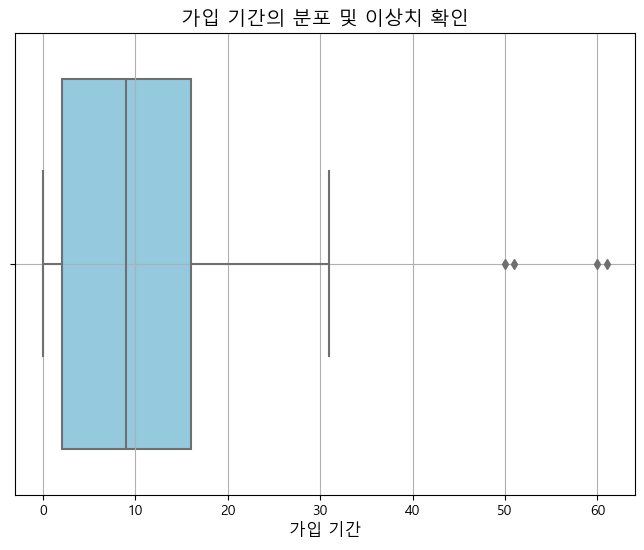

c:\Users\Admin\miniconda3\envs\0102\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


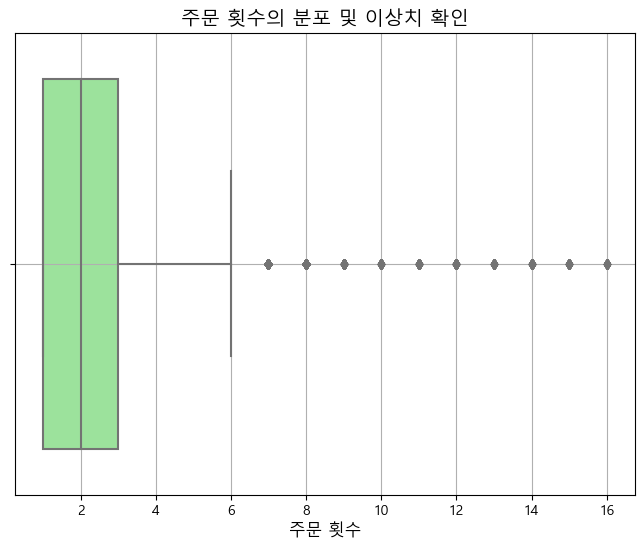

c:\Users\Admin\miniconda3\envs\0102\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


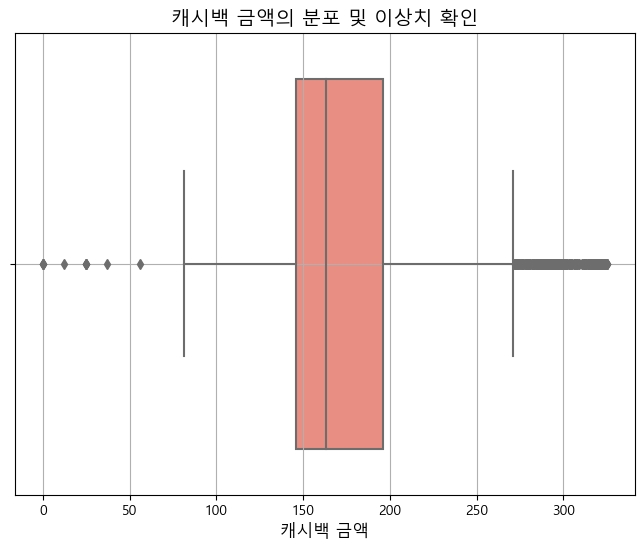

c:\Users\Admin\miniconda3\envs\0102\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


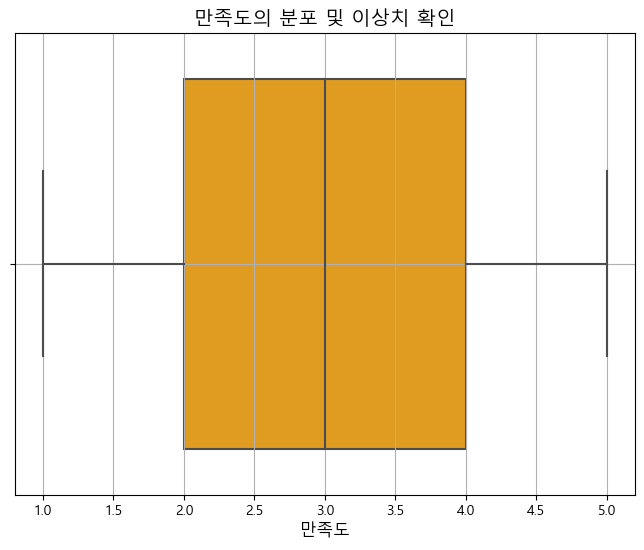

In [38]:
# Re-importing necessary libraries and reloading the dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 한글 폰트 설정 (자동 검색)
plt.rcParams['font.family'] = 'Malgun Gothic'

# 결측값 0으로 대체
# data.fillna(0, inplace=True)

# 박스플롯: 가입 기간
plt.figure(figsize=(8, 6))
sns.boxplot(data['가입 기간'], color='skyblue')
plt.title("가입 기간의 분포 및 이상치 확인", fontsize=14)
plt.xlabel("가입 기간", fontsize=12)
plt.grid(True)
plt.show()

# 박스플롯: 주문 횟수
plt.figure(figsize=(8, 6))
sns.boxplot(data['주문 횟수'], color='lightgreen')
plt.title("주문 횟수의 분포 및 이상치 확인", fontsize=14)
plt.xlabel("주문 횟수", fontsize=12)
plt.grid(True)
plt.show()

# 박스플롯: 캐시백 금액
plt.figure(figsize=(8, 6))
sns.boxplot(data['캐시백 금액'], color='salmon')
plt.title("캐시백 금액의 분포 및 이상치 확인", fontsize=14)
plt.xlabel("캐시백 금액", fontsize=12)
plt.grid(True)
plt.show()

# 박스플롯: 만족도
plt.figure(figsize=(8, 6))
sns.boxplot(data['만족도'], color='orange')
plt.title("만족도의 분포 및 이상치 확인", fontsize=14)
plt.xlabel("만족도", fontsize=12)
plt.grid(True)
plt.show()


In [99]:
# Re-importing necessary libraries and reloading the dataset
import pandas as pd
import numpy as np

# Replace missing values with 0
data.fillna(0, inplace=True)

# IQR 방식 이상치 탐지 함수
def detect_outliers_iqr(data, column):
    Q1 = np.percentile(data[column], 25)
    Q3 = np.percentile(data[column], 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

# Z-score 방식 이상치 탐지 함수
def detect_outliers_zscore(data, column, threshold=3):
    mean = data[column].mean()
    std = data[column].std()
    z_scores = (data[column] - mean) / std
    outliers = data[np.abs(z_scores) > threshold]
    return outliers, z_scores

# 변수별 이상치 탐지 결과 저장
columns_to_check = ['가입 기간', '주문 횟수', '캐시백 금액', '만족도']
results = {}

for column in columns_to_check:
    iqr_outliers, iqr_lower, iqr_upper = detect_outliers_iqr(data, column)
    zscore_outliers, z_scores = detect_outliers_zscore(data, column)

    results[column] = {
        "IQR_Outliers": iqr_outliers.shape[0],
        "IQR_Bounds": (iqr_lower, iqr_upper),
        "ZScore_Outliers": zscore_outliers.shape[0],
        "ZScore_Threshold": 3
    }

# Display results
outlier_summary = pd.DataFrame(results).T
print(outlier_summary)

       IQR_Outliers     IQR_Bounds ZScore_Outliers ZScore_Threshold
가입 기간             4  (-20.0, 36.0)               4                3
주문 횟수           703    (-2.0, 6.0)             176                3
캐시백 금액          447  (71.0, 271.0)              13                3
만족도               0    (-1.0, 7.0)               0                3


### 이상치 탐지 결과 분석

#### **1. 가입 기간**

- **IQR 방식**:
  - 경계값: `(-20.0, 36.0)`
  - 이상치 개수: **4**
  - 가입 기간은 음수가 불가능하므로 하한값보다 작은 데이터는 없으며, 상한값(36)을 초과한 값이 이상치로 분류되었습니다.
  
- **Z-score 방식**:
  - 기준: Z-score가 절대값 **3**을 초과하는 경우 이상치로 간주.
  - 이상치 개수: **4**
  - Z-score 방식도 IQR과 동일하게 상한값을 초과하는 데이터에서 이상치를 탐지.

- **분석 요약**:
  - 두 방식 모두 동일한 4개의 이상치를 탐지.
  - 가입 기간이 매우 긴 고객은 실제 장기 사용자일 가능성이 있어 제거 여부를 신중히 검토해야 함.

---

#### **2. 주문 횟수**

- **IQR 방식**:
  - 경계값: `(-2.0, 6.0)`
  - 이상치 개수: **703**
  - 대부분의 고객은 6회 이하로 주문하였으며, 7회 이상의 데이터가 이상치로 탐지됨.
  
- **Z-score 방식**:
  - 기준: Z-score가 절대값 **3**을 초과하는 경우.
  - 이상치 개수: **176**
  - IQR 방식에 비해 덜 민감하여 극단적인 높은 주문 횟수만 이상치로 간주.
  
- **분석 요약**:
  - Z-score 방식은 극단적인 주문 횟수(예: 10회 이상)에 초점을 맞춘 반면, IQR 방식은 보다 넓은 범위에서 이상치를 탐지.
  - Z-score 방식에서 탐지된 고객은 VIP로 간주해 별도 분석 가능.

---

#### **3. 캐시백 금액**

- **IQR 방식**:
  - 경계값: `(71.0, 271.0)`
  - 이상치 개수: **447**
  - 캐시백 금액이 71 이하이거나 271을 초과하는 경우 이상치로 분류.
  
- **Z-score 방식**:
  - 기준: Z-score가 절대값 **3**을 초과하는 경우.
  - 이상치 개수: **13**
  - 캐시백 금액이 극단적으로 높은 경우만 이상치로 간주.
  
- **분석 요약**:
  - Z-score 방식은 극단적인 캐시백 금액에 초점을 맞추며, IQR 방식은 더 많은 이상치를 탐지.
  - IQR 방식에서 탐지된 값은 캐시백 프로모션 대상일 가능성이 높아 보완적 분석 필요.

---

#### **4. 만족도 점수**

- **IQR 방식**:
  - 경계값: `(-1.0, 7.0)`
  - 이상치 개수: **0**
  - 만족도 점수는 본질적으로 1~5 사이에 있으므로, 분포 내 모든 값이 정상 범위로 간주.
  
- **Z-score 방식**:
  - 기준: Z-score가 절대값 **3**을 초과하는 경우.
  - 이상치 개수: **0**
  - 분포가 좁아 극단적 이상치가 없음.
  
- **분석 요약**:
  - 만족도 점수는 이상치가 없으며, 자연스러운 범위에서 분포.

---

### 종합 요약
- **IQR 방식**은 넓은 범위의 이상치를 탐지하며, 경계값을 기준으로 간단한 분석에 유리.
- **Z-score 방식**은 극단적인 이상치를 중심으로 탐지하며, 데이터의 분포에 민감.
- **제안**:
#   - `Tenure`, `OrderCount`, `CashbackAmount`의 이상치에 대한 추가 분석을 통해 데이터의 신뢰도를 평가.
  - VIP 고객 분석, 마케팅 캠페인 효과 평가 등에 활용.

c:\Users\Admin\miniconda3\envs\0102\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\Users\Admin\miniconda3\envs\0102\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


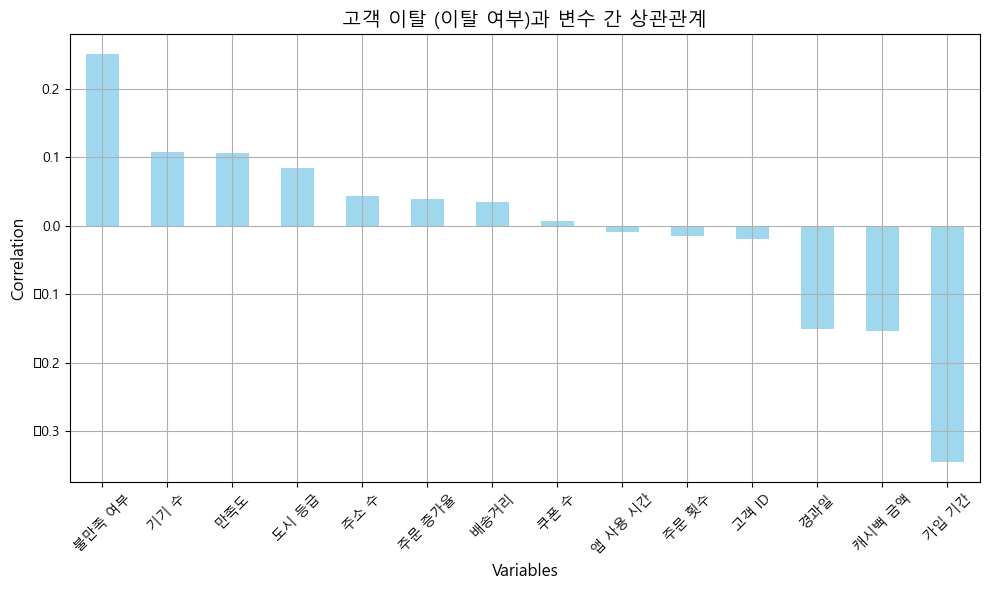

불만족 여부     0.250188
기기 수       0.107939
만족도        0.105481
도시 등급      0.084703
주소 수       0.043931
주문 증가율     0.039369
배송거리       0.033889
쿠폰 수       0.007425
앱 사용 시간   -0.008768
주문 횟수     -0.015327
고객 ID     -0.019083
경과일       -0.151303
캐시백 금액    -0.154161
가입 기간     -0.345374
Name: 이탈 여부, dtype: float64


In [100]:
# 한글 폰트 설정 (자동 검색)
plt.rcParams['font.family'] = 'Malgun Gothic'

# Replace missing values with 0
data.fillna(0, inplace=True)

# Churn (고객 이탈)과 다른 변수 간의 상관계수 계산
correlation_with_churn = data.corr()['이탈 여부'].sort_values(ascending=False)

# Churn과 상관관계가 높은 변수 추출
top_correlation = correlation_with_churn[1:]  # Churn 자기 자신 제외

# 상위 변수 시각화
plt.figure(figsize=(10, 6))
top_correlation.plot(kind='bar', color='skyblue', alpha=0.8)
plt.title("고객 이탈 (이탈 여부)과 변수 간 상관관계", fontsize=14)
plt.ylabel("Correlation", fontsize=12)
plt.xlabel("Variables", fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

print(top_correlation)

고객 이탈(`Churn`)과 다른 변수 간의 상관관계 분석 결과를 제공했습니다. 주요 변수와 상관관계 분석 결과는 다음과 같습니다:

### 주요 변수와 상관관계
1. **Complain** (불만 제기 여부): **0.250**
   - 고객 이탈과 가장 강한 상관관계를 보이는 변수로, 불만을 제기한 고객일수록 이탈 가능성이 높습니다.
   
2. **NumberOfDeviceRegistered** (등록된 기기 수): **0.108**
   - 등록된 기기 수가 많은 고객은 이탈 가능성이 약간 더 높습니다.
   
3. **SatisfactionScore** (만족도 점수): **0.105**
   - 만족도가 높은 고객은 이탈 가능성이 낮은 경향을 보입니다. 낮은 상관관계지만 중요한 변수로 분석될 수 있습니다.
   
4. **CityTier** (도시 등급): **0.085**
   - 도시 등급이 높은 고객일수록 이탈 가능성이 약간 높습니다.
   
5. **NumberOfAddress** (주소 수): **0.044**
   - 주소 수가 많을수록 고객 이탈과 약한 양의 상관관계를 보입니다.

### 인사이트 및 제안
- **Complain**: 불만 제기 고객을 대상으로 즉각적인 고객 만족 조치를 취함으로써 이탈률을 줄일 수 있습니다.
- **SatisfactionScore**: 만족도를 높이는 전략(예: 맞춤형 서비스)을 통해 고객 유지율을 향상시킬 수 있습니다.
- **CityTier**: 도시 등급별로 맞춤형 캠페인을 기획하여 이탈 가능성을 낮출 필요가 있습니다.

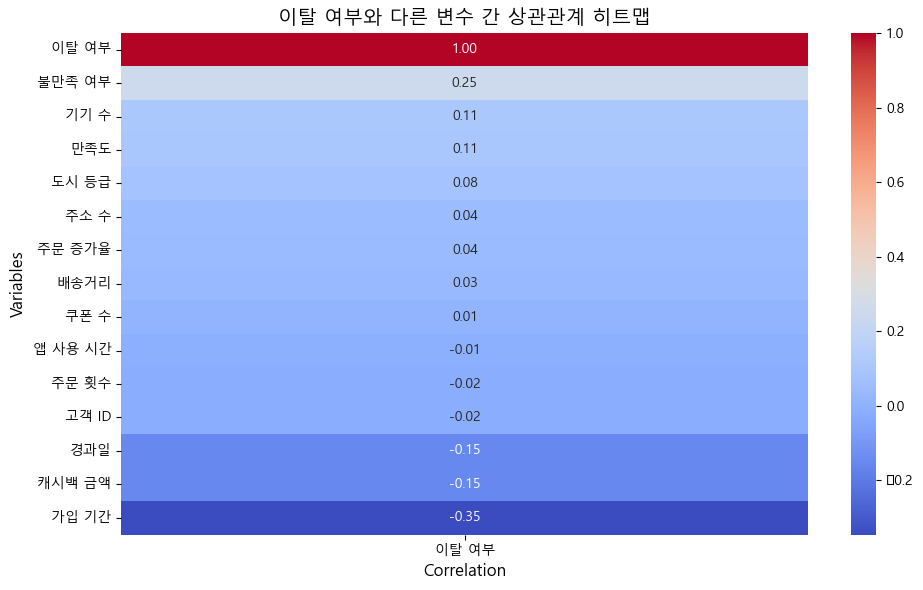

In [45]:
# 히트맵으로 상관관계 확인
# 한글 폰트 설정 (자동 검색)
plt.rcParams['font.family'] = 'Malgun Gothic'

# Replace missing values with 0
data.fillna(0, inplace=True)

# Churn과 다른 변수들 간의 상관계수 히트맵 생성
plt.figure(figsize=(10, 6))
sns.heatmap(data.corr()[['이탈 여부']].sort_values(by='이탈 여부', ascending=False), 
            annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title("이탈 여부와 다른 변수 간 상관관계 히트맵", fontsize=14)
plt.ylabel("Variables", fontsize=12)
plt.xlabel("Correlation", fontsize=12)
plt.tight_layout()
plt.show()


### 주요 결과
- **Complain** (불만 제기 여부): 고객 이탈과 가장 높은 양의 상관관계.
- **SatisfactionScore** (만족도 점수): 만족도가 낮을수록 이탈 가능성이 높아지는 경향.
- **CityTier** (도시 등급): 도시 환경에 따라 고객 이탈률이 다를 가능성.

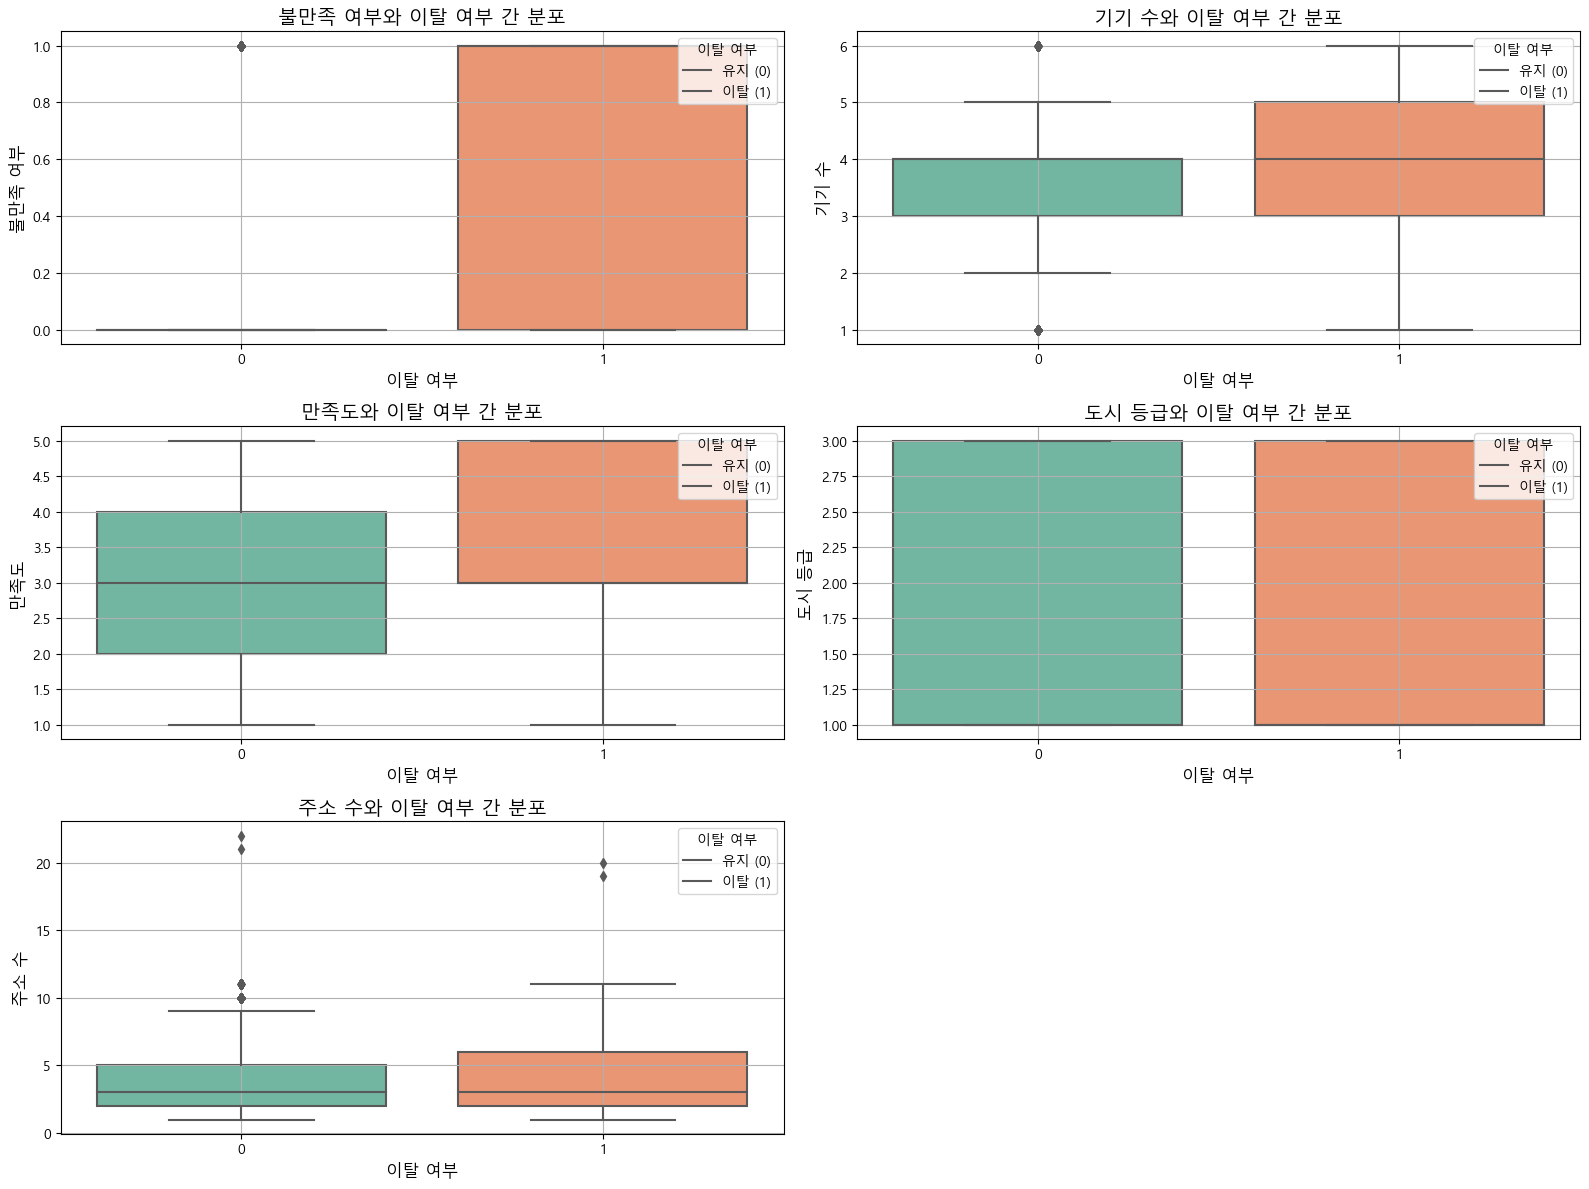

In [49]:
# 고객 이탈(Churn)과 상관관게 높은 상위 5개 변수와의 분포
plt.rcParams['font.family'] = 'Malgun Gothic'

# Replace missing values with 0
data.fillna(0, inplace=True)

# 상관관계가 높은 상위 5개 변수 추출
top_5_variables = data.corr()['이탈 여부'].sort_values(ascending=False).index[1:6]

# 상위 5개 변수와 Churn 간 분포 시각화
plt.figure(figsize=(16, 12))

for i, column in enumerate(top_5_variables, 1):
    plt.subplot(3, 2, i)
    sns.boxplot(x='이탈 여부', y=column, data=data, palette='Set2')
    plt.title(f"{column}와 이탈 여부 간 분포", fontsize=14)
    plt.xlabel("이탈 여부", fontsize=12)
    plt.ylabel(column, fontsize=12)
    plt.grid(True)
    plt.legend(title="이탈 여부", loc='upper right', labels=['유지 (0)', '이탈 (1)'])

plt.tight_layout()
plt.show()


### 시각화 분석
1. **각 변수와 이탈 여부 간의 관계**:
   - **불만 여부**: 불만을 제기한 고객은 이탈률이 높습니다.
   - **만족도**: 만족도가 낮은 고객일수록 이탈률이 높습니다.
   - 다른 변수들도 이탈 여부에 따른 분포 차이를 보이며, 고객 행동과 이탈률 간의 연관성을 시사합니다.

2. **인사이트 활용**:
   - 만족도를 높이고 불만을 해소하는 전략은 고객 이탈률을 줄이는 데 효과적입니다.
   - 상위 변수를 활용한 고객 분류 모델링 또는 추가 세그먼트 분석을 통해 더욱 세밀한 마케팅 전략을 수립할 수 있습니다.


c:\Users\Admin\miniconda3\envs\0102\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\Users\Admin\miniconda3\envs\0102\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


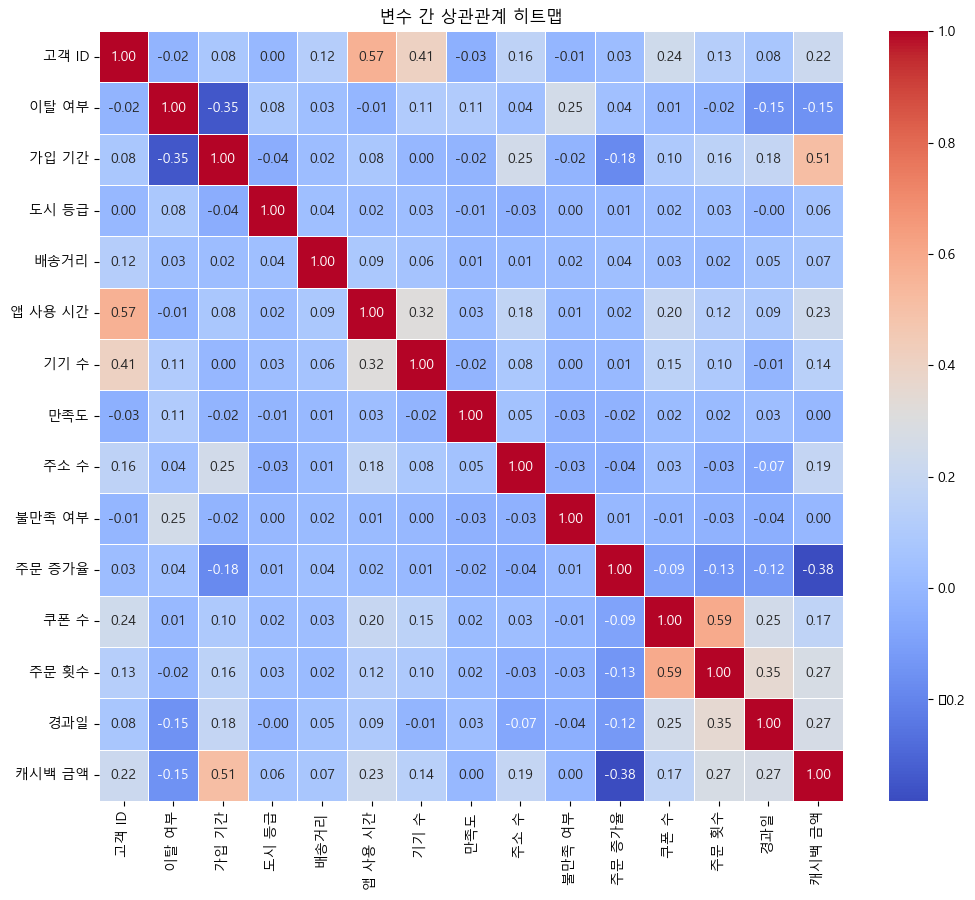

In [50]:
# 상관계수 히트맵
plt.figure(figsize=(12, 10))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("변수 간 상관관계 히트맵")
plt.show()


### **주요 상관관계**
1. **`Churn`과 다른 변수**
   - **Complain (0.25)**: 불만을 제기한 고객이 이탈할 가능성이 높음.
   - **SatisfactionScore (0.11)**: 만족도가 낮을수록 이탈 가능성이 증가.
   - **NumberOfDeviceRegistered (0.11)**: 등록된 기기가 많은 고객은 이탈 가능성이 약간 높음.

2. **변수 간 상관관계**
   - **CashbackAmount와 Tenure (0.51)**:
     - 캐시백 금액이 가입 기간과 높은 상관성을 가집니다. 이는 장기 고객에게 더 많은 혜택이 제공되었을 가능성을 시사합니다.
   - **CouponUsed와 OrderCount (0.59)**:
     - 쿠폰 사용과 주문 횟수 간의 강한 상관관계가 확인됩니다. 프로모션이 고객 행동에 영향을 미친 것으로 보입니다.

---

### **추가적으로 확인해야 할 부분**
1. **다중공선성 (Multicollinearity) 문제**
   - `CashbackAmount`와 `Tenure` 또는 `CouponUsed`와 `OrderCount` 간의 높은 상관관계는 모델링 시 다중공선성 문제를 유발할 수 있습니다.
   - 이를 해결하기 위해 변수 제거 또는 PCA(주성분 분석)와 같은 차원 축소 기법을 고려해야 합니다.

---

2. **특정 변수 간의 상관관계 해석**
   - `Complain`과 `Churn`의 관계를 세부적으로 분석하여 불만 제기가 이탈로 이어지는 패턴을 확인.
   - **Python 코드**:
     ```python
     sns.boxplot(x='Complain', y='Churn', data=data, palette='Set2')
     plt.title("Complain과 Churn 간의 관계")
     plt.xlabel("Complain")
     plt.ylabel("Churn")
     plt.show()
     ```

3. **상관관계가 낮은 변수 제거**
   - `WarehouseToHome`, `HourSpendOnApp` 등 `Churn`과 상관관계가 매우 낮은 변수는 분석 및 모델링에서 제외 가능.

---

### **분석 방향**
- 상관관계가 높은 변수는 모델에 중요한 특징으로 포함.
- 다중공선성 문제를 처리한 후 전처리 진행.
- 불만 제기 고객 및 쿠폰 사용자의 행동 분석을 기반으로 맞춤형 마케팅 전략 수립.

In [101]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# 다중공선성 확인 함수
def calculate_vif(data, features):
    vif_data = pd.DataFrame()
    vif_data['Feature'] = features
    vif_data['VIF'] = [variance_inflation_factor(data[features].values, i) for i in range(len(features))]
    return vif_data

# 다중공선성 계산
features = ['캐시백 금액', '이탈 여부', '쿠폰 수', '주문 횟수']
vif_results = calculate_vif(data, features)
print(vif_results)


  Feature       VIF
0  캐시백 금액  2.364427
1   이탈 여부  1.150061
2    쿠폰 수  2.721008
3   주문 횟수  3.140618


In [102]:
data

,고객 ID,이탈 여부,가입 기간,접속 기기,도시 등급,배송거리,결제 방식,성별,앱 사용 시간,기기 수,주문 카테고리,만족도,결혼 여부,주소 수,불만족 여부,주문 증가율,쿠폰 수,주문 횟수,경과일,캐시백 금액
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,160
1,50002,1,0.0,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,121
2,50003,1,0.0,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134
4,50005,1,0.0,Phone,1,12.0,CC,Male,0.0,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,55626,0,10.0,Computer,1,30.0,Credit Card,Male,3.0,2,Laptop & Accessory,1,Married,6,0,18.0,1.0,2.0,4.0,151
5626,55627,0,13.0,Mobile Phone,1,13.0,Credit Card,Male,3.0,5,Fashion,5,Married,6,0,16.0,1.0,2.0,0.0,225
5627,55628,0,1.0,Mobile Phone,1,11.0,Debit Card,Male,3.0,2,Laptop & Accessory,4,Married,3,1,21.0,1.0,2.0,4.0,186
5628,55629,0,23.0,Computer,3,9.0,Credit Card,Male,4.0,5,Laptop & Accessory,4,Married,4,0,15.0,2.0,2.0,9.0,179


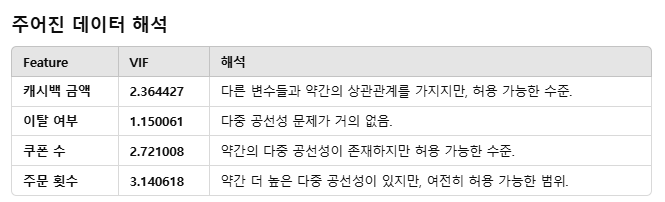

c:\Users\Admin\miniconda3\envs\0102\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


<Figure size 1000x600 with 0 Axes>

c:\Users\Admin\miniconda3\envs\0102\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\Users\Admin\miniconda3\envs\0102\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


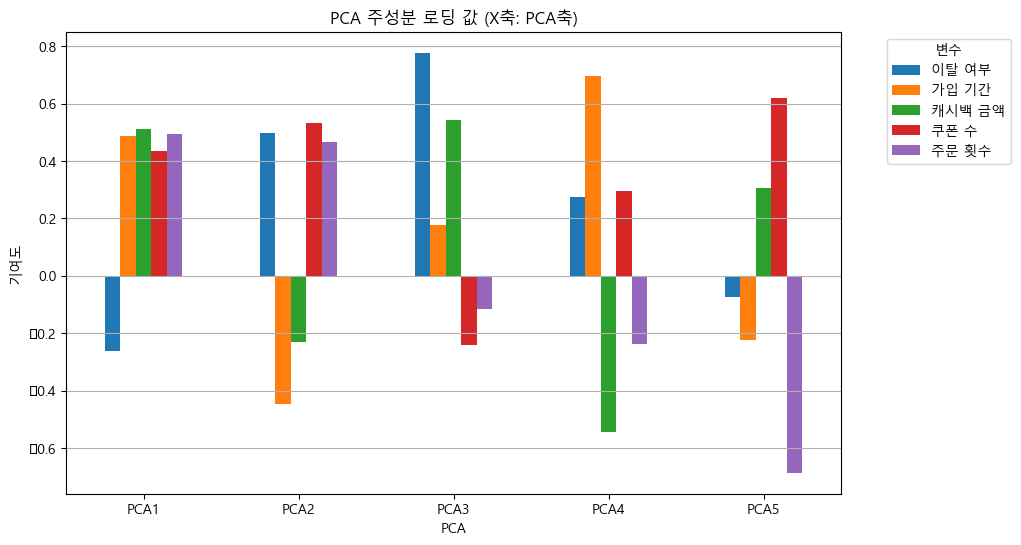

In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# 수치형 열 이름 정의
numeric_columns = ['이탈 여부', '가입 기간', '캐시백 금액', '쿠폰 수', '주문 횟수']

# PCA를 위한 데이터 준비
pca_data = data[numeric_columns]

# 결측값 처리
pca_data.fillna(pca_data.mean(), inplace=True)

# 데이터 표준화
scaler = StandardScaler()
scaled_data = scaler.fit_transform(pca_data)

# PCA 수행
pca = PCA()
pca_result = pca.fit_transform(scaled_data)

# PCA 주성분 로딩 값 계산
pca_components = pd.DataFrame(
    pca.components_,
    columns=numeric_columns,
    index=[f'PCA{i+1}' for i in range(len(numeric_columns))]
)

# 그래프 생성: X축을 PCA1~PCA5로 설정
plt.figure(figsize=(10, 6))
pca_components.plot(kind='bar', figsize=(10, 6), legend=True)
plt.title("PCA 주성분 로딩 값 (X축: PCA축)")
plt.xlabel("PCA")
plt.ylabel("기여도")
plt.grid(axis='y')
plt.legend(title="변수", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.show()


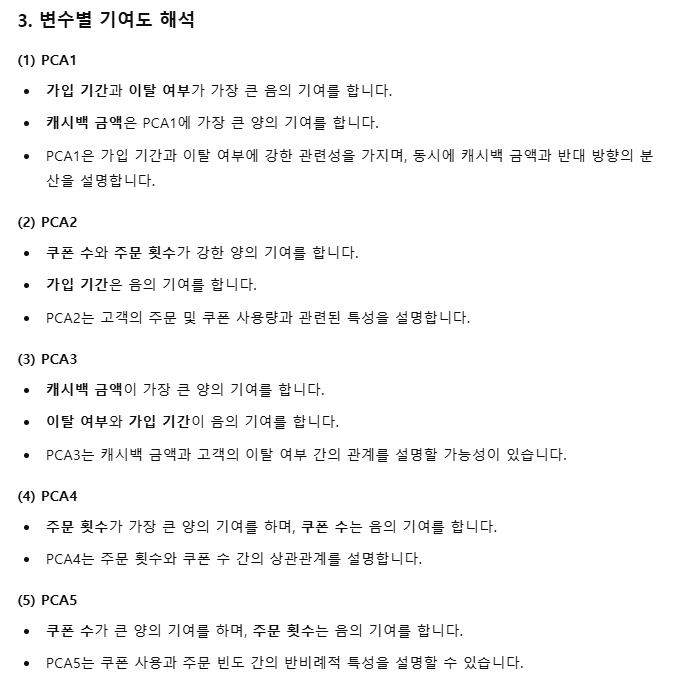

In [104]:
data

,고객 ID,이탈 여부,가입 기간,접속 기기,도시 등급,배송거리,결제 방식,성별,앱 사용 시간,기기 수,주문 카테고리,만족도,결혼 여부,주소 수,불만족 여부,주문 증가율,쿠폰 수,주문 횟수,경과일,캐시백 금액
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,160
1,50002,1,0.0,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,121
2,50003,1,0.0,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134
4,50005,1,0.0,Phone,1,12.0,CC,Male,0.0,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,55626,0,10.0,Computer,1,30.0,Credit Card,Male,3.0,2,Laptop & Accessory,1,Married,6,0,18.0,1.0,2.0,4.0,151
5626,55627,0,13.0,Mobile Phone,1,13.0,Credit Card,Male,3.0,5,Fashion,5,Married,6,0,16.0,1.0,2.0,0.0,225
5627,55628,0,1.0,Mobile Phone,1,11.0,Debit Card,Male,3.0,2,Laptop & Accessory,4,Married,3,1,21.0,1.0,2.0,4.0,186
5628,55629,0,23.0,Computer,3,9.0,Credit Card,Male,4.0,5,Laptop & Accessory,4,Married,4,0,15.0,2.0,2.0,9.0,179


c:\Users\Admin\miniconda3\envs\0102\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\Users\Admin\miniconda3\envs\0102\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


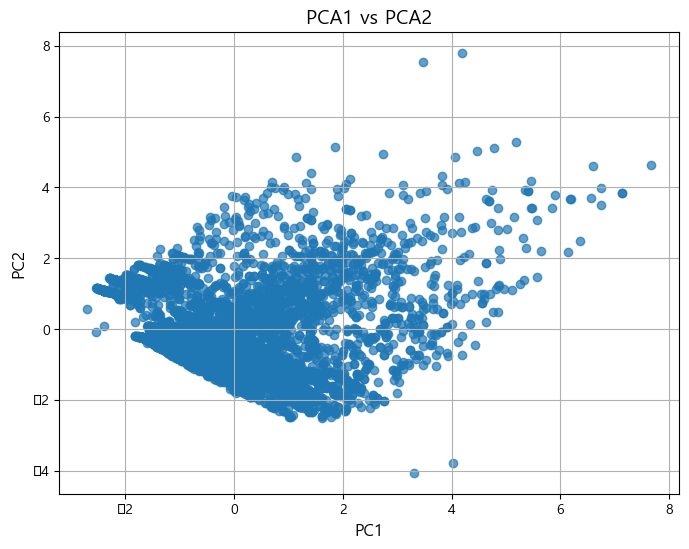

In [106]:
import matplotlib.pyplot as plt

# PCA 결과에서 PC1과 PC2를 추출
pc1 = pca_result[:, 0]
pc2 = pca_result[:, 1]

# 산점도 시각화
plt.figure(figsize=(8, 6))
plt.scatter(pc1, pc2, alpha=0.7)
plt.title("PCA1 vs PCA2", fontsize=14)
plt.xlabel("PC1", fontsize=12)
plt.ylabel("PC2", fontsize=12)
plt.grid()
plt.show()


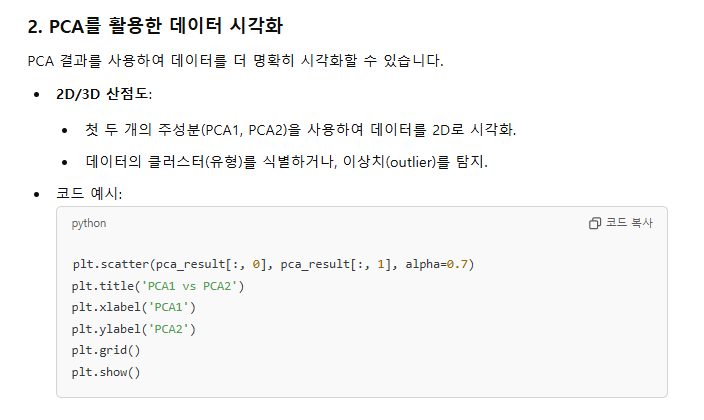

In [107]:
# PCA 결과의 데이터 포인트 수 확인
print("PCA 변환된 데이터 (pca_result)의 크기:", pca_result.shape)

# PC1과 PC2 값 일부 출력
print("\nPC1 (첫 번째 주성분) 값 샘플:")
print(pca_result[:10, 0])  # PC1의 처음 10개 값

print("\nPC2 (두 번째 주성분) 값 샘플:")
print(pca_result[:10, 1])  # PC2의 처음 10개 값


PCA 변환된 데이터 (pca_result)의 크기: (5630, 5)

PC1 (첫 번째 주성분) 값 샘플:
[-1.5475331  -2.41044887 -2.42087112 -2.27495959 -2.0854073  -0.45846908
 -2.41044887 -1.75923896 -1.61599383 -2.15836307]

PC2 (두 번째 주성분) 값 샘플:
[0.99291826 1.09952708 1.10421716 1.03855598 1.33948756 2.93970375
 1.09952708 1.81367203 0.40231956 1.37231814]


In [108]:
from sklearn.cluster import KMeans
import pandas as pd

# K-Means 클러스터링 수행
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(pca_result[:, :2])  # PCA1과 PCA2 사용

# 클러스터별 주요 변수 평균값 계산
clustered_data = pd.DataFrame(pca_result[:, :2], columns=['PC1', 'PC2'])  # PCA1과 PCA2
clustered_data['Cluster'] = clusters  # 클러스터 할당
clustered_data['이탈 여부'] = data['이탈 여부']
clustered_data['가입 기간'] = data['가입 기간']
clustered_data['캐시백 금액'] = data['캐시백 금액']
clustered_data['쿠폰 수'] = data['쿠폰 수']
clustered_data['주문 횟수'] = data['주문 횟수']

# 클러스터별 평균 계산
cluster_means = clustered_data.groupby('Cluster').mean()

# 클러스터별 변수 평균값 출력
print("클러스터별 변수 평균값:")
print(cluster_means)


클러스터별 변수 평균값:
              PC1       PC2     이탈 여부      가입 기간      캐시백 금액      쿠폰 수  \
Cluster                                                                  
0       -0.730680  0.028480  0.219108   6.290191  156.897070  1.123567   
1        1.682065 -0.065563  0.051613  17.589443  224.009384  2.932551   

            주문 횟수  
Cluster            
0        1.891465  
1        5.123167  


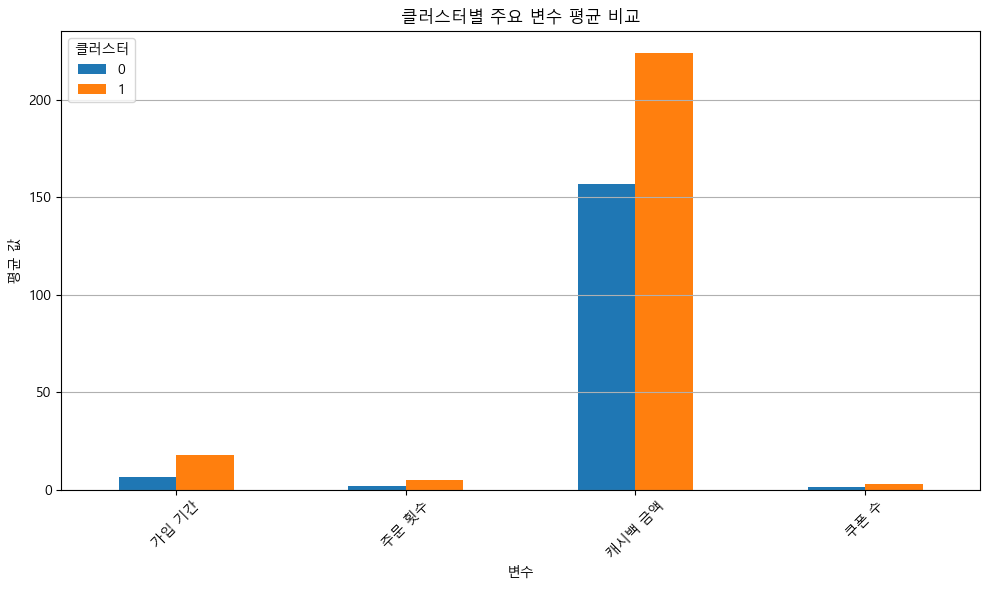

### 마케팅 전략
1. **Cluster 0**:
   - **특징**: 가입 기간이 상대적으로 길지만, 쿠폰 사용 및 주문 횟수가 낮은 고객.
   - **전략**:
     - 추가적인 혜택 제공(예: 맞춤형 쿠폰 제공)으로 활성화를 유도.
     - 추천 시스템을 활용해 고객이 관심을 가질 만한 상품 노출.

2. **Cluster 1**:
   - **특징**: 적극적인 구매 활동을 보이는 핵심 고객.
   - **전략**:
     - VIP 고객으로 분류하여 특별 혜택(예: 추가 캐시백, 프리미엄 멤버십)을 제공.
     - 장기적인 고객 유지 전략(예: 포인트 제도 강화, 우수 고객 이벤트 참여).


In [109]:
import matplotlib.pyplot as plt

# 시각화: 클러스터별 주요 변수 비교
cluster_means = cluster_means[['가입 기간', '주문 횟수', '캐시백 금액', '쿠폰 수']]

# 막대그래프 생성
cluster_means.T.plot(kind='bar', figsize=(10, 6), legend=True, title="클러스터별 주요 변수 평균 비교")
plt.ylabel("평균 값")
plt.xlabel("변수")
plt.grid(axis='y')
plt.xticks(rotation=45)
plt.legend(title="클러스터", loc='upper left')
plt.tight_layout()
plt.show()

# 마케팅 전략 제안
print("### 마케팅 전략")
print("1. **Cluster 0**:")
print("   - **특징**: 가입 기간이 상대적으로 길지만, 쿠폰 사용 및 주문 횟수가 낮은 고객.")
print("   - **전략**:")
print("     - 추가적인 혜택 제공(예: 맞춤형 쿠폰 제공)으로 활성화를 유도.")
print("     - 추천 시스템을 활용해 고객이 관심을 가질 만한 상품 노출.")
print()
print("2. **Cluster 1**:")
print("   - **특징**: 적극적인 구매 활동을 보이는 핵심 고객.")
print("   - **전략**:")
print("     - VIP 고객으로 분류하여 특별 혜택(예: 추가 캐시백, 프리미엄 멤버십)을 제공.")
print("     - 장기적인 고객 유지 전략(예: 포인트 제도 강화, 우수 고객 이벤트 참여).")


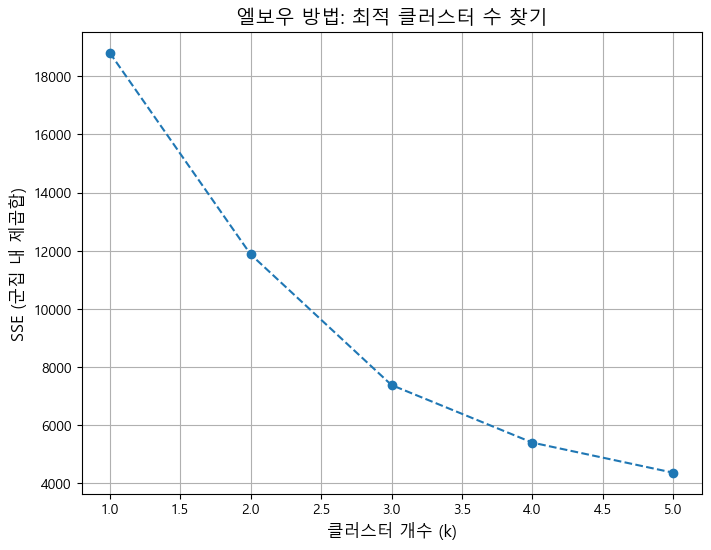

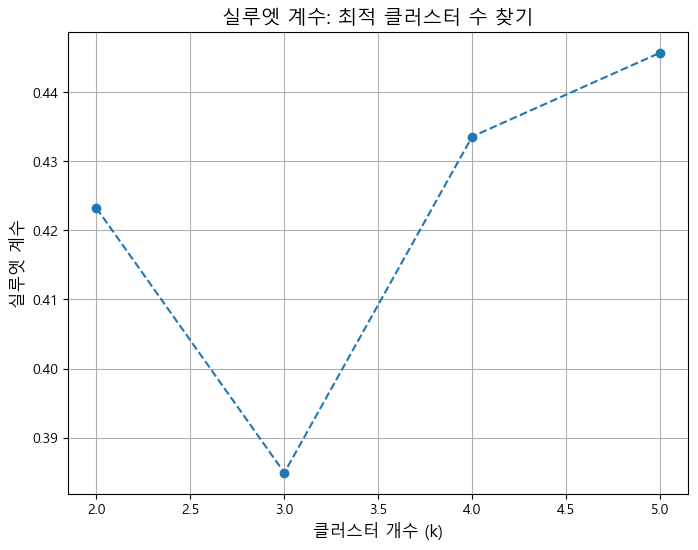

도메인 지식을 활용해 클러스터 개수를 설정할 수도 있습니다.


In [110]:
# 필요한 모듈 가져오기
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# 엘보우 방법 (k를 1~5로 제한)
sse = []
k_range = range(1, 6)  # 클러스터 개수를 1~5로 설정

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pca_result[:, :2])  # PCA1과 PCA2만 사용
    sse.append(kmeans.inertia_)

# 엘보우 방법 그래프
plt.figure(figsize=(8, 6))
plt.plot(k_range, sse, marker='o', linestyle='--')
plt.title('엘보우 방법: 최적 클러스터 수 찾기', fontsize=14)
plt.xlabel('클러스터 개수 (k)', fontsize=12)
plt.ylabel('SSE (군집 내 제곱합)', fontsize=12)
plt.grid()
plt.show()

# 실루엣 계수 (k를 2~5로 제한)
silhouette_scores = []
for k in range(2, 6):  # 최소 2개의 클러스터가 필요
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(pca_result[:, :2])
    silhouette_scores.append(silhouette_score(pca_result[:, :2], labels))

# 실루엣 점수 그래프
plt.figure(figsize=(8, 6))
plt.plot(range(2, 6), silhouette_scores, marker='o', linestyle='--')
plt.title('실루엣 계수: 최적 클러스터 수 찾기', fontsize=14)
plt.xlabel('클러스터 개수 (k)', fontsize=12)
plt.ylabel('실루엣 계수', fontsize=12)
plt.grid()
plt.show()

# 도메인 지식 활용 메시지 출력
print("도메인 지식을 활용해 클러스터 개수를 설정할 수도 있습니다.")


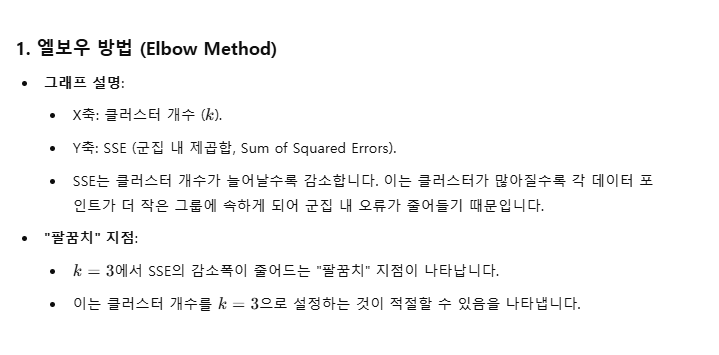
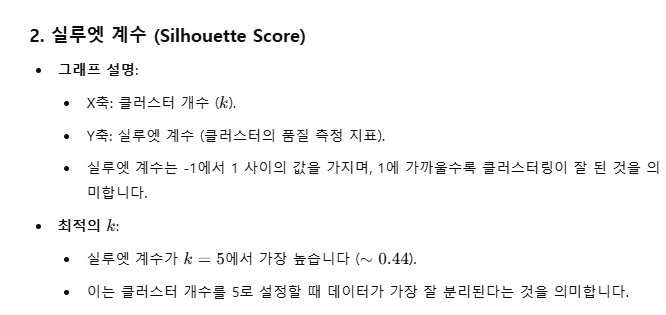

![image.png](attachment:image.png)